In [329]:
import numpy as np
from scipy.ndimage.filters import gaussian_filter, maximum_filter, convolve
from matplotlib import pyplot as plt
from copy import deepcopy
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [337]:
### example of real data

img = np.load('/home/user/zhaoy/local_dir/data/Lupine_22august/mri.npy')
img = np.squeeze(img)
img = img.astype(int)
print(img.shape)

@interact
def interactive_plot_x(x=(0,img.shape[1],1)):
    plot_one_slice(img, 'x', x)
    
@interact
def interactive_plot_y(y=(0,img.shape[2],1)):
    plot_one_slice(img, 'y', y)

@interact
def interactive_plot_z(z=(0,img.shape[0],1)):
    plot_one_slice(img, 'z', z)

    


(120, 256, 256)


interactive(children=(IntSlider(value=128, description='x', max=256), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=128, description='y', max=256), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=60, description='z', max=120), Output()), _dom_classes=('widget-interact…

(120, 256, 256)


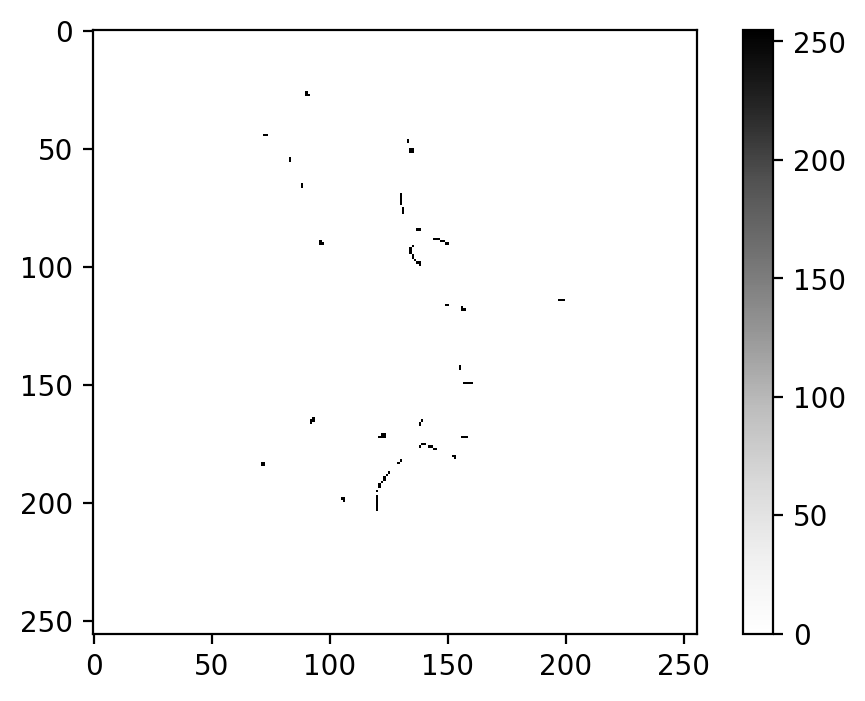

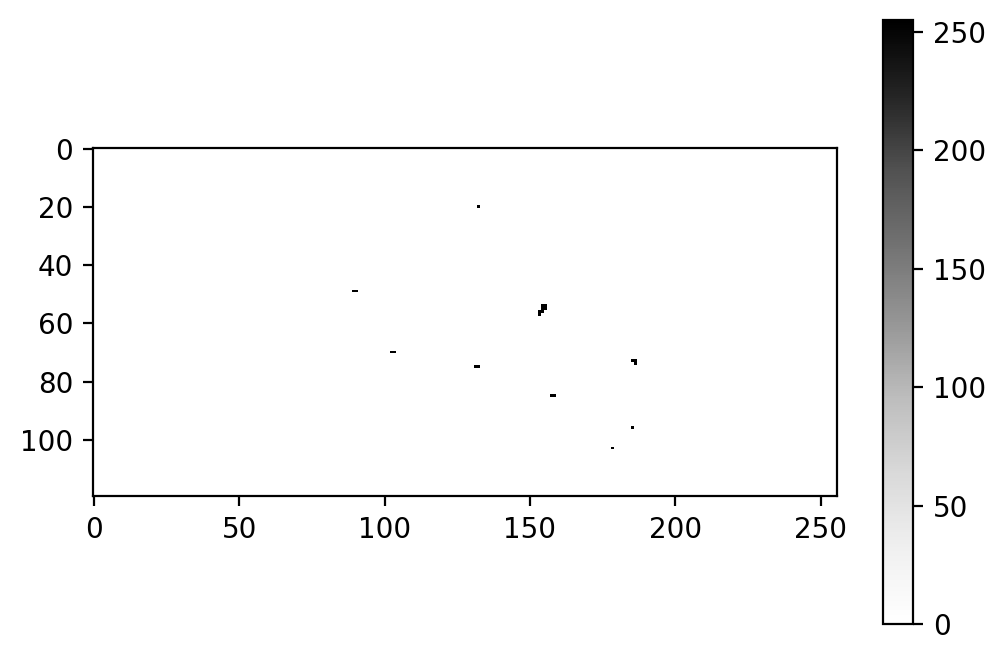

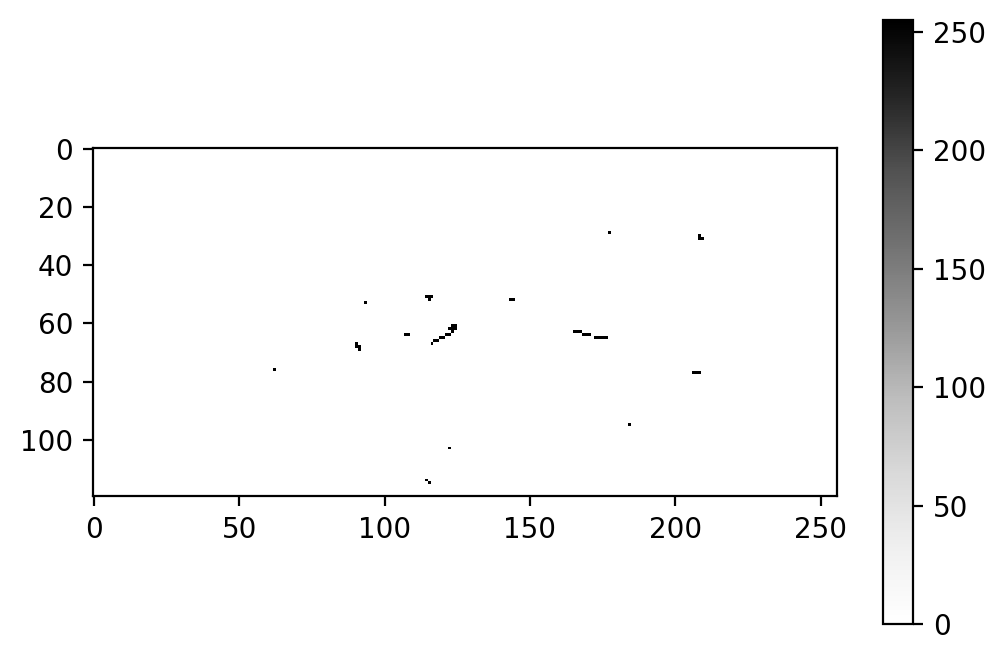

In [338]:
### gt of lupine22
img = np.load('/home/user/zhaoy/local_dir/data/Lupine_22august/r_factor_0.34/rot_0/x_flip_0/y_flip_0/x_y_swap_0/256x256x120/ground_truth.npy')
img = np.squeeze(img)
img = img.astype(int)
print(img.shape)
plot_one_slice(img, 'z', 67)
plot_one_slice(img, 'x', 150)
plot_one_slice(img, 'y', 150)




(128, 256, 256)


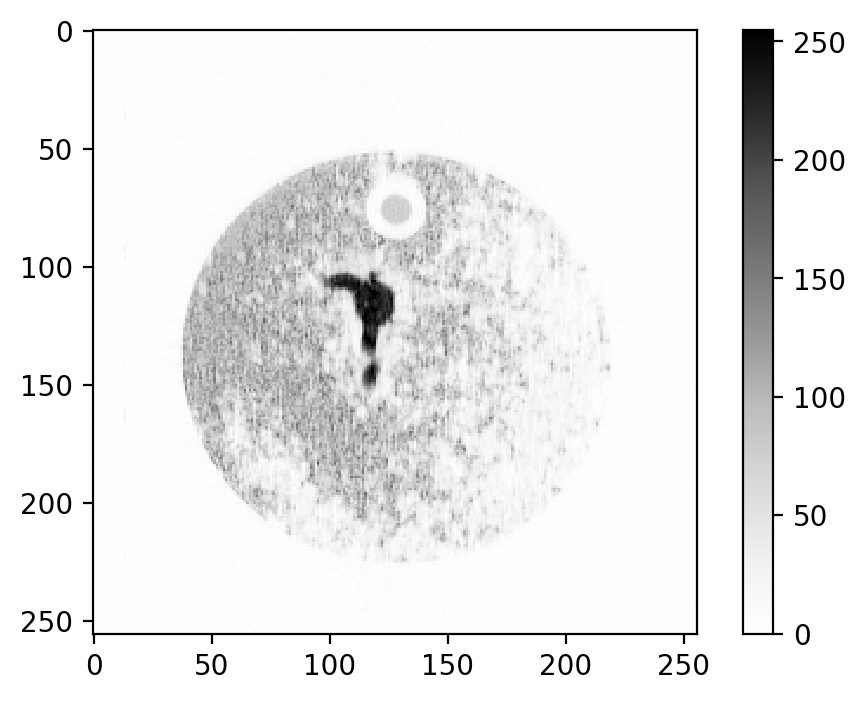

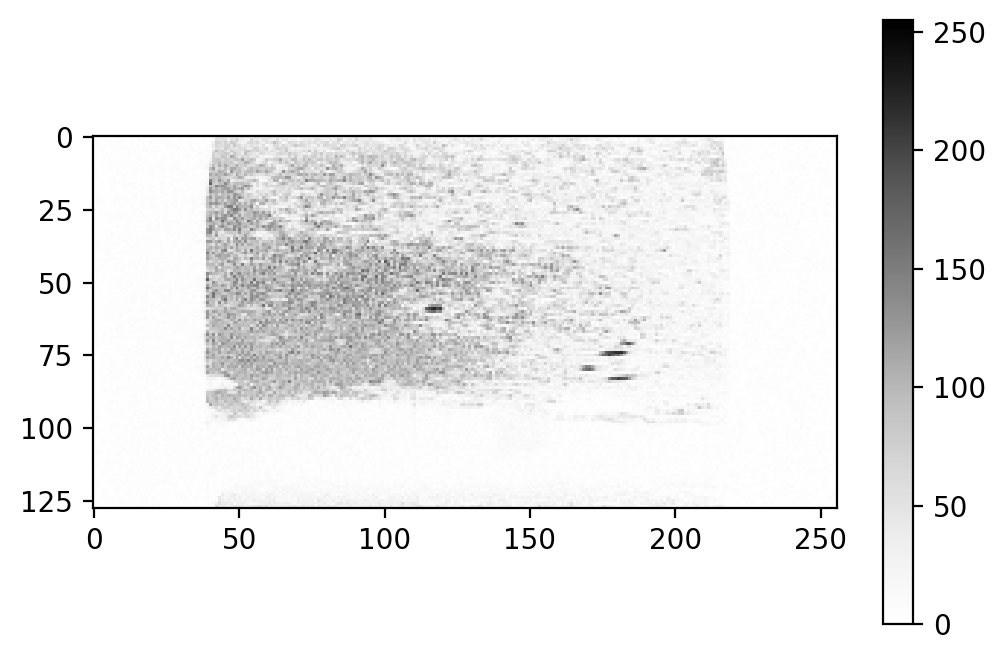

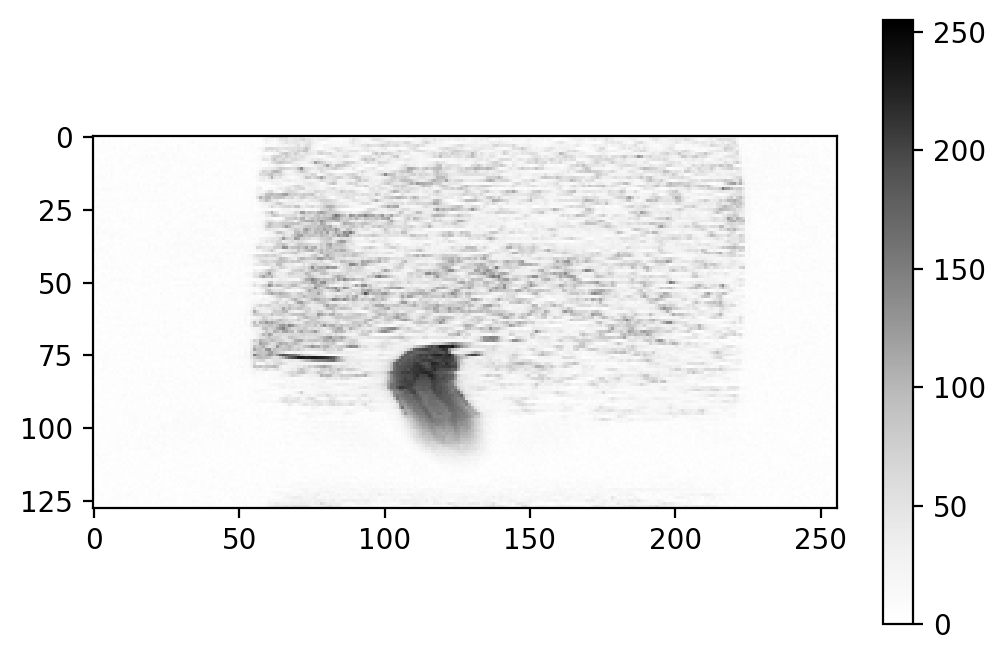

In [325]:
### example of real data
img = np.load('/home/user/zhaoy/local_dir/data/lupine_small_xml/mri.npy')
img = np.squeeze(img)
print(img.shape)
plot_one_slice(img, 'z', 60)
plot_one_slice(img, 'x', 150)
plot_one_slice(img, 'y', 150)

(120, 256, 256)


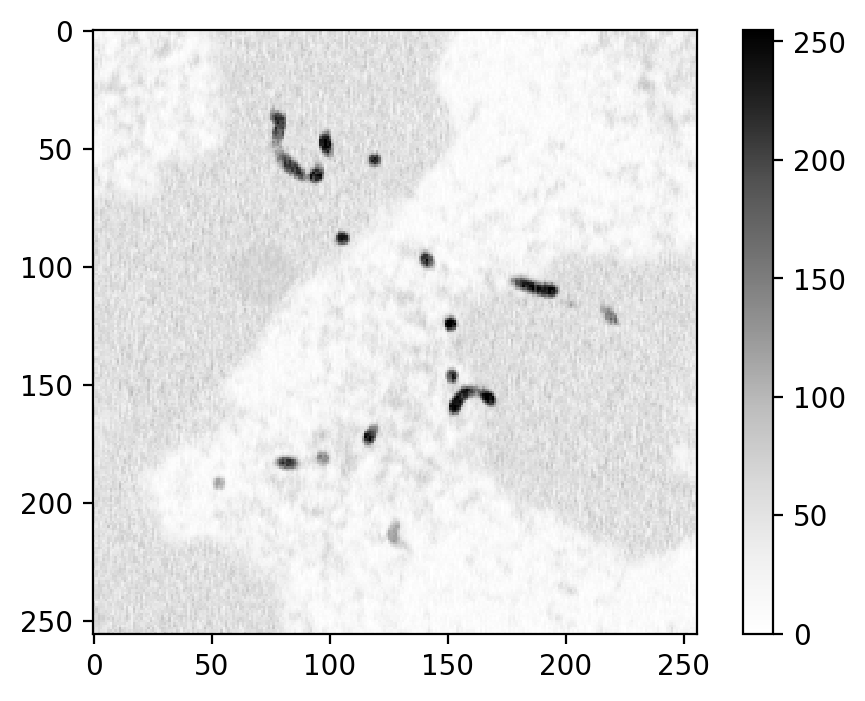

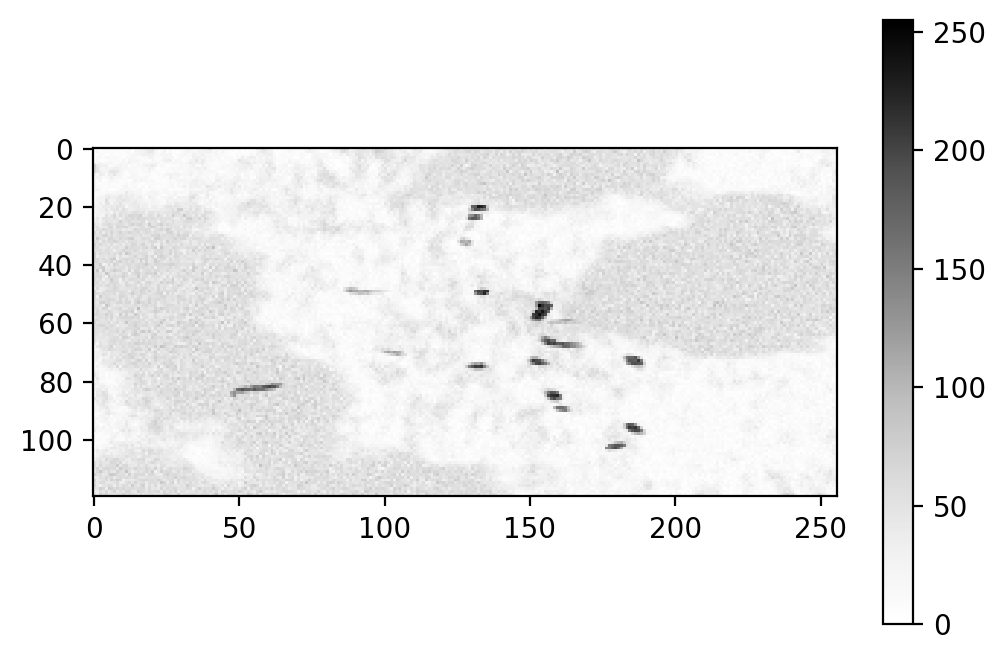

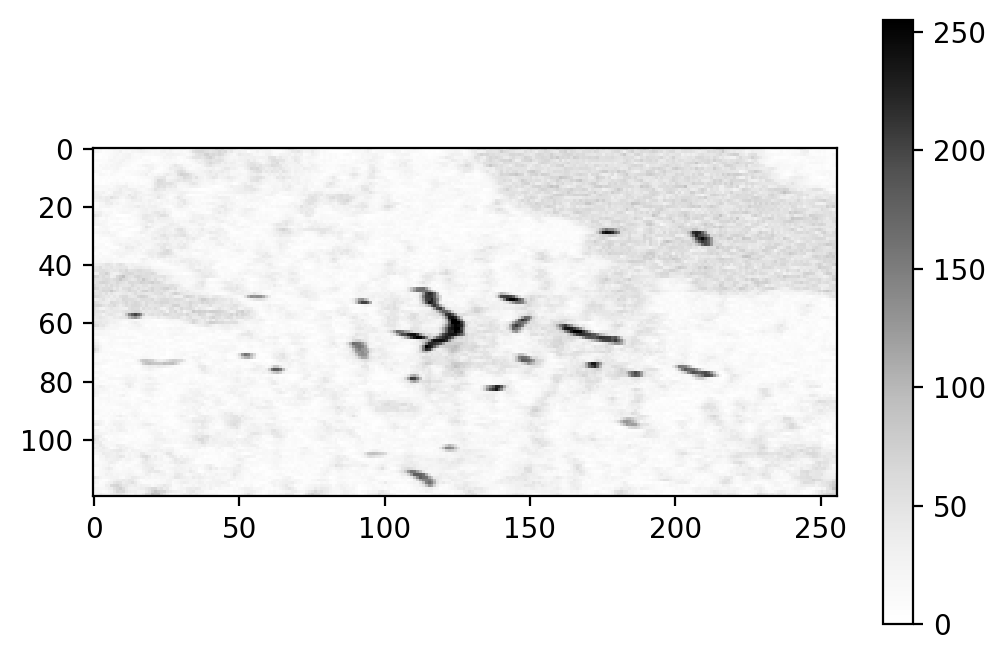

In [183]:
### example of previous combined data
img = np.load('/home/user/zhaoy/local_dir/data/Lupine_22august/r_factor_1.00/rot_0/x_flip_0/y_flip_0/x_y_swap_0/256x256x120/noisy_2_d_new_.npy')
img = np.squeeze(img)
print(img.shape)
plot_one_slice(img, 'z', 60)
plot_one_slice(img, 'x', 150)
plot_one_slice(img, 'y', 150)


In [47]:
def plot_one_slice(array_3d, dim, idx, vmin=0, vmax=255):
    plt.figure(dpi=200)
    if dim=='x':  # shape of array_3d should be z,x,y
        plt.imshow(array_3d[:,idx,:], cmap='Greys', vmin=vmin, vmax=vmax)
    elif dim=='y':
        plt.imshow(array_3d[:,:,idx], cmap='Greys', vmin=vmin, vmax=vmax)
    elif dim=='z':
#         array_3d[array_3d<118]=0
        plt.imshow(array_3d[idx,:,:], cmap='Greys', vmin=vmin, vmax=vmax)
    plt.colorbar()
    plt.show()

def plot_merged_slices(array_3d, dim, idx0, idx1, title=None, vmin=0, vmax=255):
    plt.figure(dpi=200)
    if dim=='x':  # shape of array_3d should be z,x,y
        to_show=np.max(array_3d[:,idx0:idx1,:], axis=1)
        plt.imshow(to_show, cmap='Greys', vmin=vmin, vmax=vmax)  # aspect=2
    elif dim=='y':
        plt.imshow(np.max(array_3d[:,:,idx0:idx1], axis=2), cmap='Greys', vmin=vmin, vmax=vmax)
    elif dim=='z':
#         array_3d[array_3d<118]=0
        plt.imshow(np.max(array_3d[idx0:idx1,:,:], axis=0), cmap='Greys', vmin=vmin, vmax=vmax)
    plt.colorbar()
    
    if title is not None:
        plt.title(title)
    plt.show()
    

def normalize_to(arr, min_value, max_value):
    arr = arr.astype(np.float32)
    arr -= arr.min()
    arr /= (arr.max() - arr.min())
    arr *= (max_value - min_value)
    arr += min_value
    return arr

In [339]:
soil_path = '/home/user/zhaoy/local_dir/data/pure_soil/virtual_soil_noise/300x300x300/d_0.npy'
soil = np.load(soil_path)
soil = np.squeeze(soil)
print(soil.shape)


(300, 300, 300)


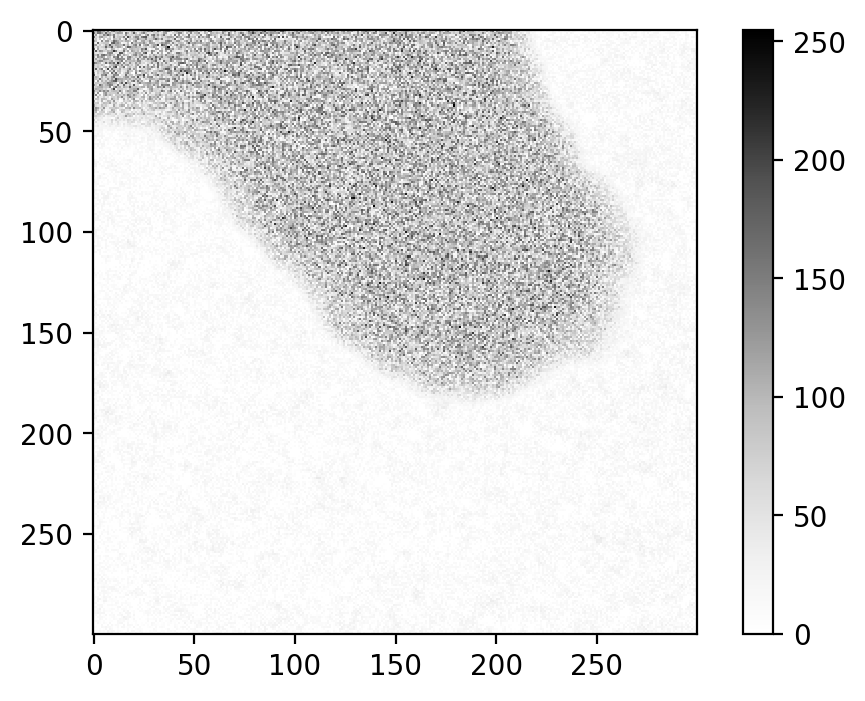

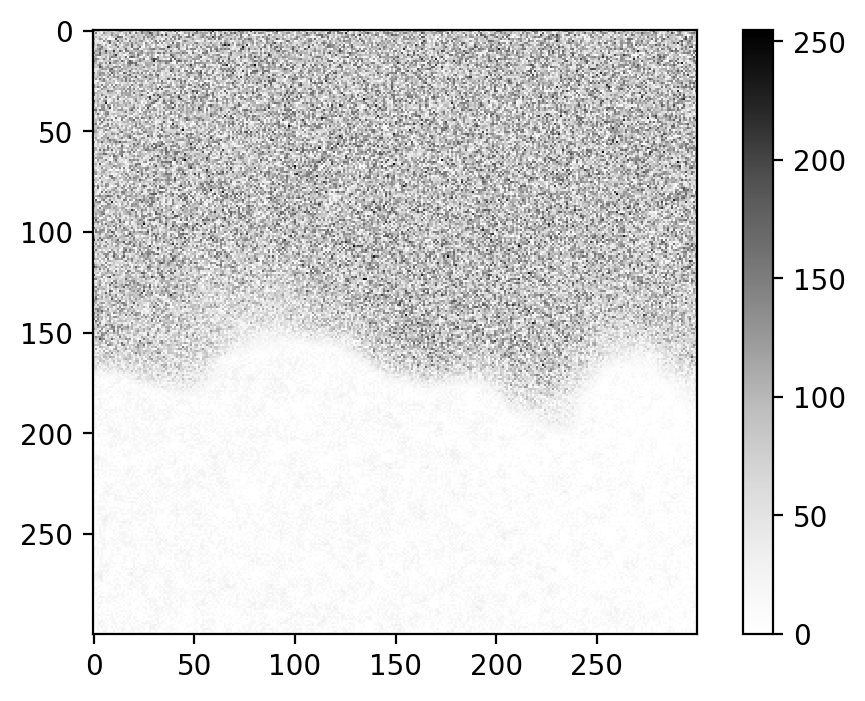

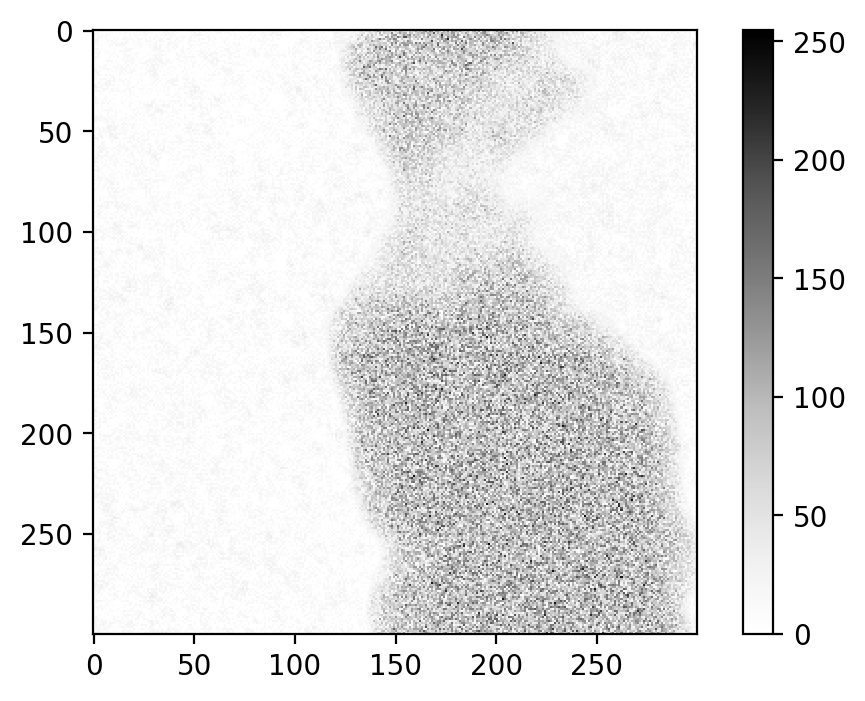

In [340]:
plot_one_slice(soil, 'x', 150)
plot_one_slice(soil, 'y', 150)
plot_one_slice(soil, 'z', 150)

In [341]:
soil = normalize_to(soil, 0, 1)
soil = 1- np.power(1-soil, 3)
soil = normalize_to(soil, 0, 255)


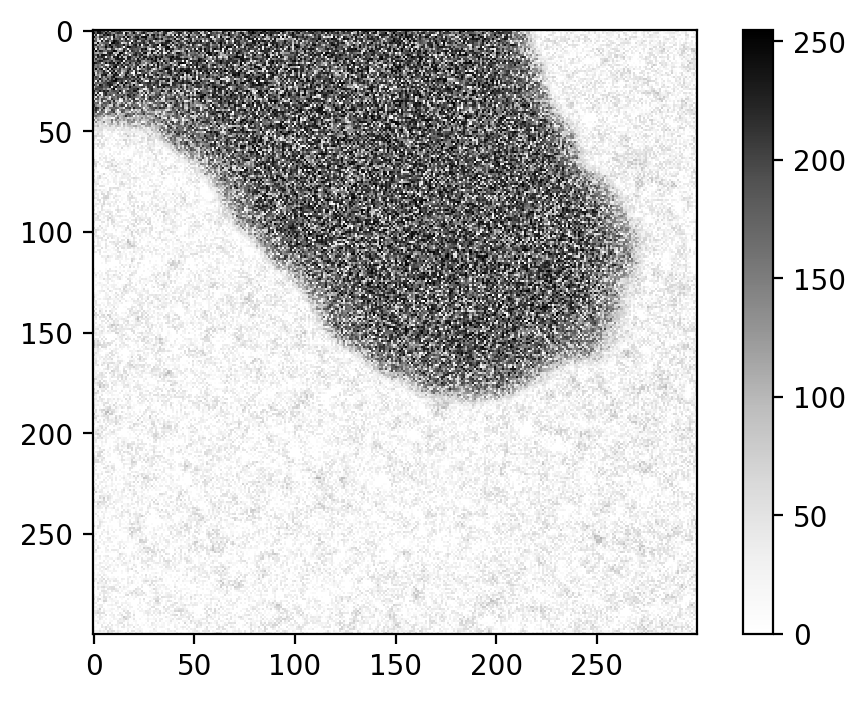

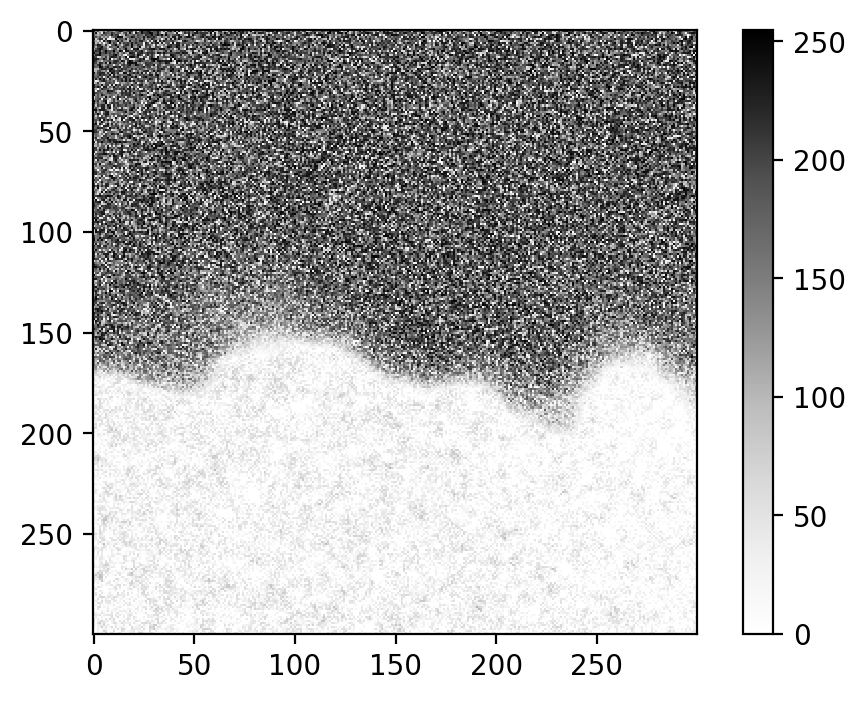

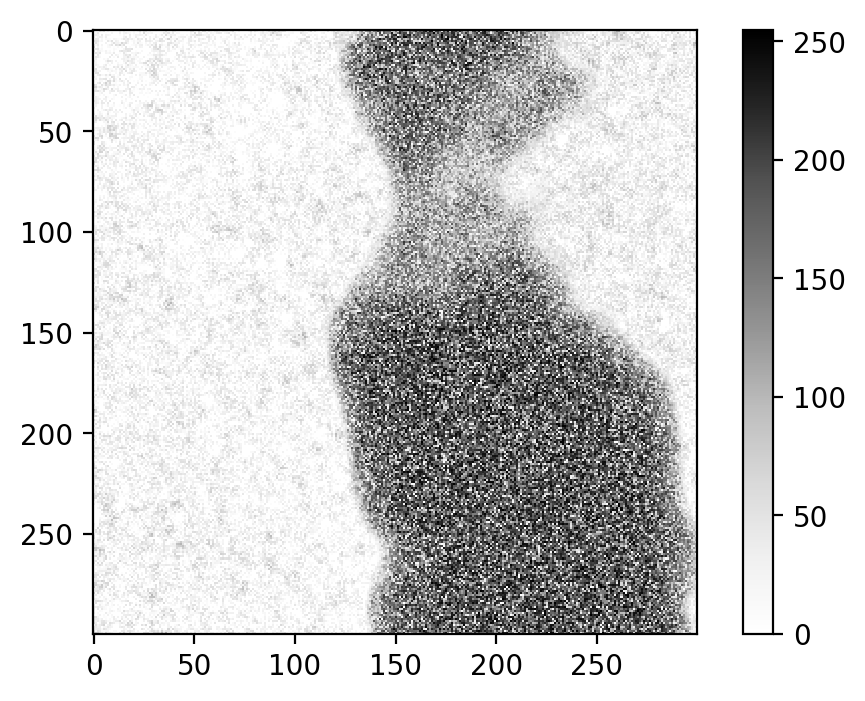

In [342]:
plot_one_slice(soil, 'x', 150)
plot_one_slice(soil, 'y', 150)
plot_one_slice(soil, 'z', 150)

In [343]:
soil = normalize_to(soil, 0, 1)
# ru_noise = np.random.uniform(0, 1, size=soil.shape)
gaussian_noise = np.random.normal(90, size=soil.shape, scale=30)
soil *= gaussian_noise
soil = np.clip(soil, 0, 180)
soil = normalize_to(soil, 0, 255)



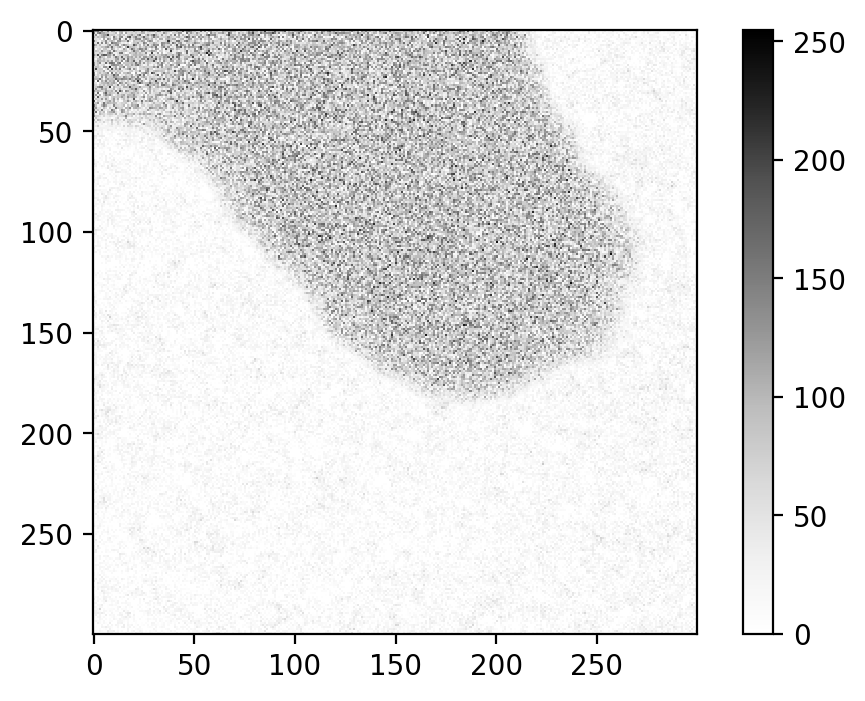

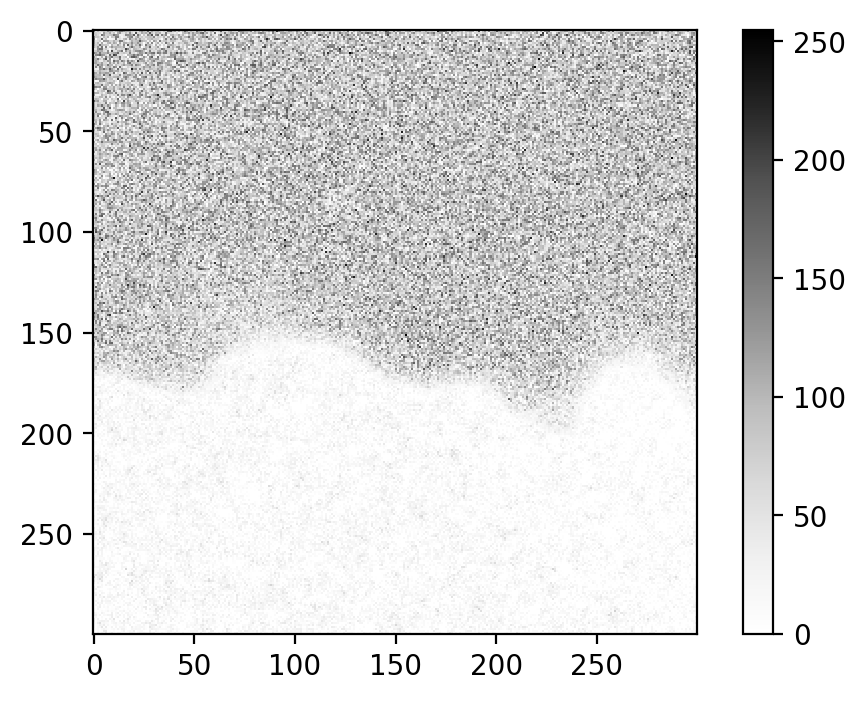

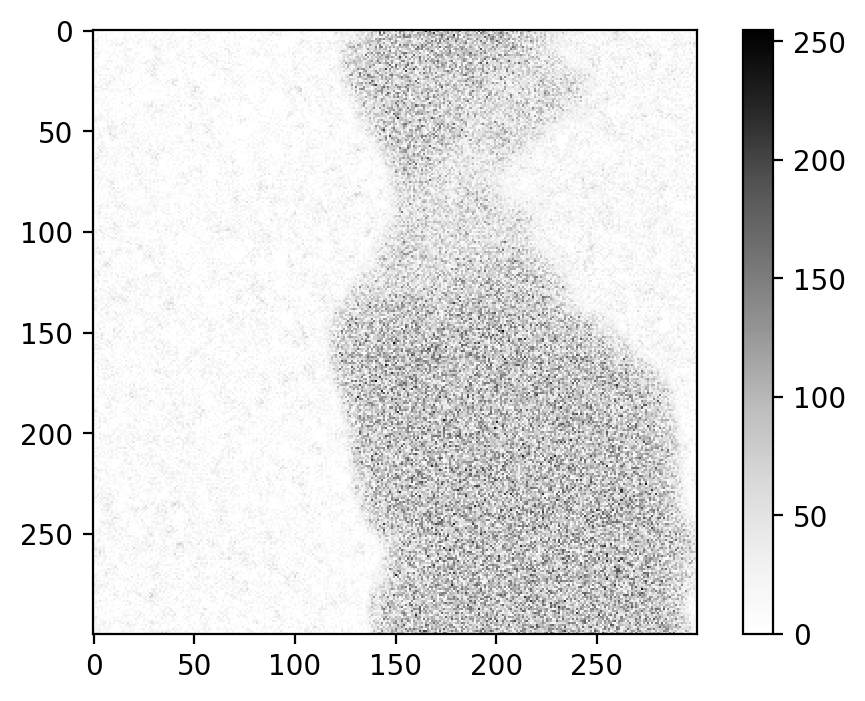

In [344]:
plot_one_slice(soil, 'x', 150)
plot_one_slice(soil, 'y', 150)
plot_one_slice(soil, 'z', 150)

In [345]:
flt = np.ones([3, 1, 1])
flt[0, :, :] = 1
flt[1, :, :] = 1.5
flt[2, :, :] = 2.5
flt /= float(flt.sum())
soil = convolve(soil, weights=flt)

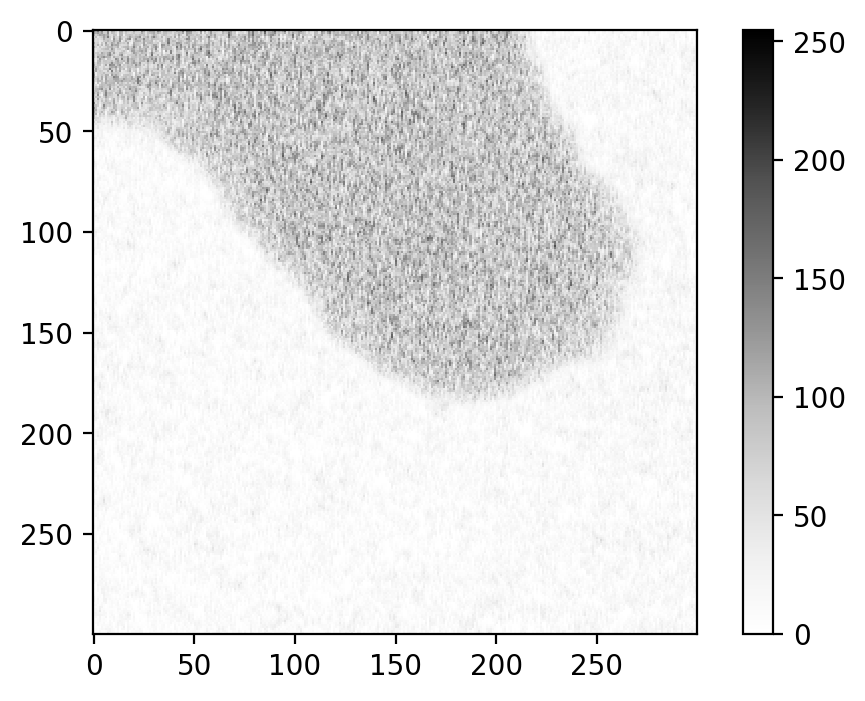

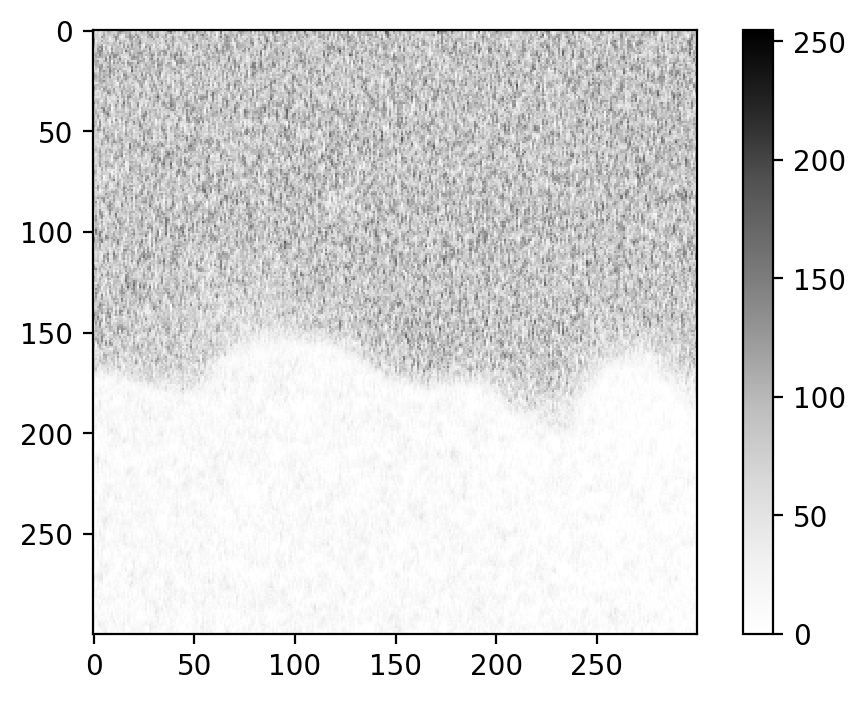

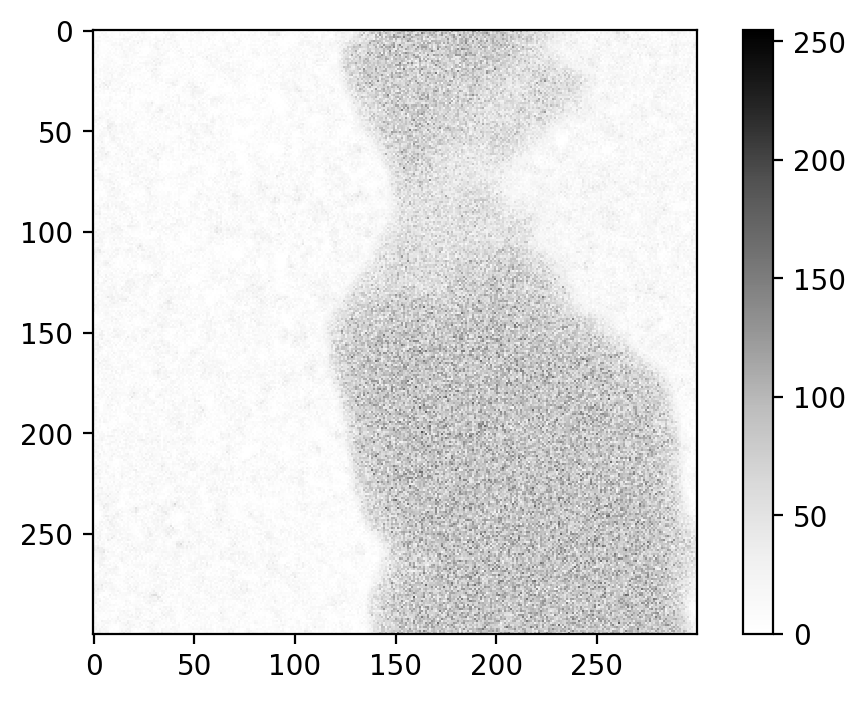

In [346]:
plot_one_slice(soil, 'x', 150)
plot_one_slice(soil, 'y', 150)
plot_one_slice(soil, 'z', 150)

In [347]:
soil = gaussian_filter(soil, sigma=0.5)

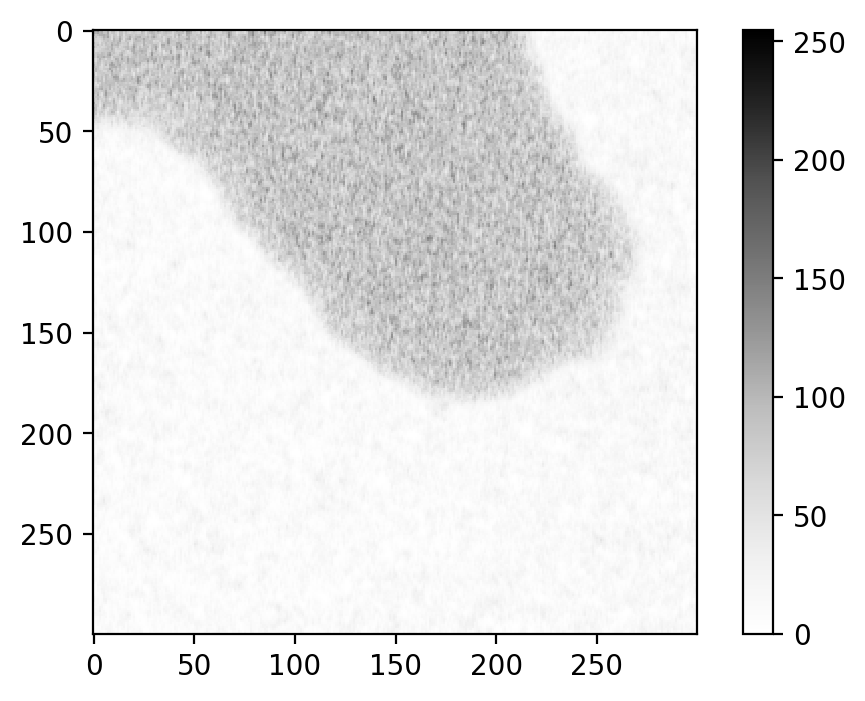

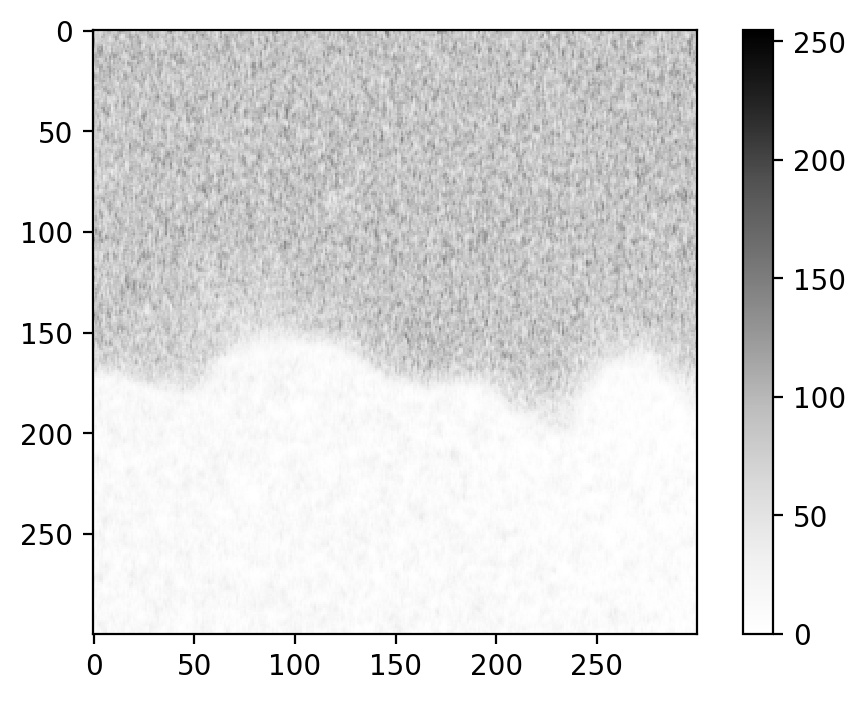

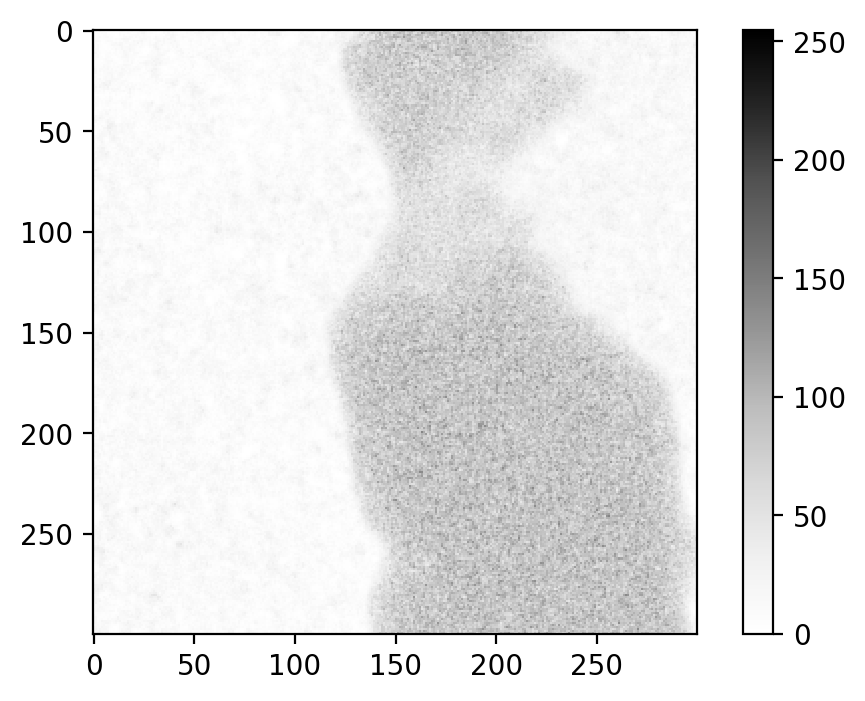

In [348]:
plot_one_slice(soil, 'x', 150)
plot_one_slice(soil, 'y', 150)
plot_one_slice(soil, 'z', 150)

In [146]:
soil.min()

4.4173785e-08

In [359]:
# root_path = '/home/user/zhaoy/local_dir/data/Lupine_22august/r_factor_1.00/rot_0/x_flip_0/y_flip_0/x_y_swap_0/256x256x120_intensity.npz'
# occ_path = '/home/user/zhaoy/local_dir/data/Lupine_22august/r_factor_1.00/rot_0/x_flip_0/y_flip_0/x_y_swap_0/256x256x120_occupancy.npz'
# root = np.load(root_path)['arr_0'].astype(np.float32)
# root = np.rollaxis(root, 2, 0)
# occ = np.load(occ_path)['arr_0'].astype(np.float32)
# occ = np.rollaxis(occ, 2, 0)

root_path = '/home/user/zhaoy/local_dir/data/random_virtual_roots/diff_time_points/845361/stopTime73.61%/occupancy_small_alias_256x256x200.npy'
occ_path = '/home/user/zhaoy/local_dir/data/random_virtual_roots/diff_time_points/845361/stopTime73.61%/occupancy_small_alias_256x256x200.npy'
root = np.load(root_path).astype(np.float32)
occ = np.load(occ_path).astype(np.float32)


print(root.shape)

(200, 256, 256)


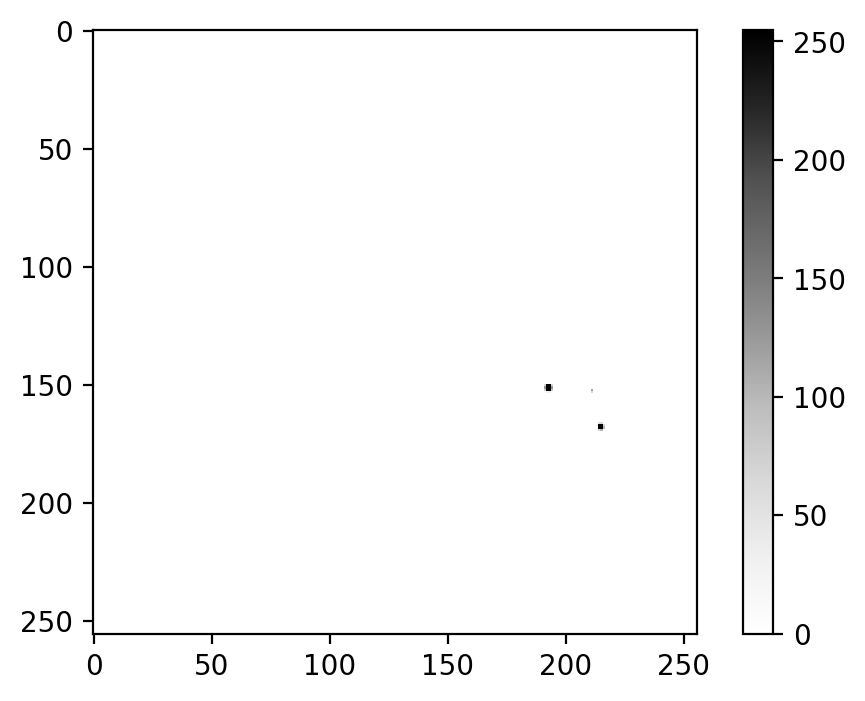

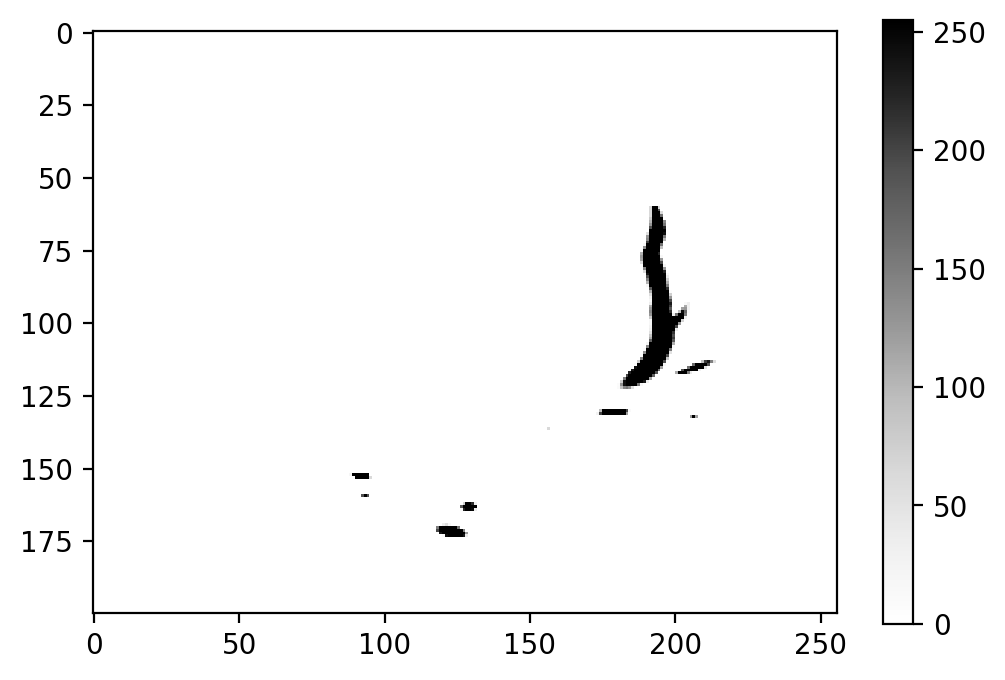

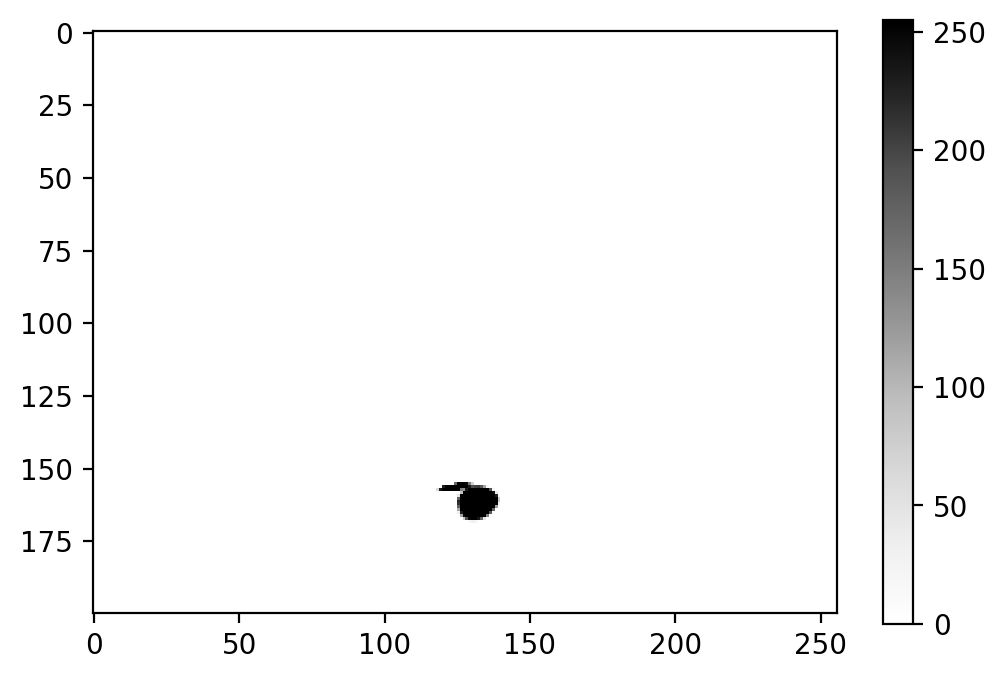

In [350]:
plot_one_slice(root, 'z', 60)
plot_one_slice(root, 'x', 150)
plot_one_slice(root, 'y', 150)


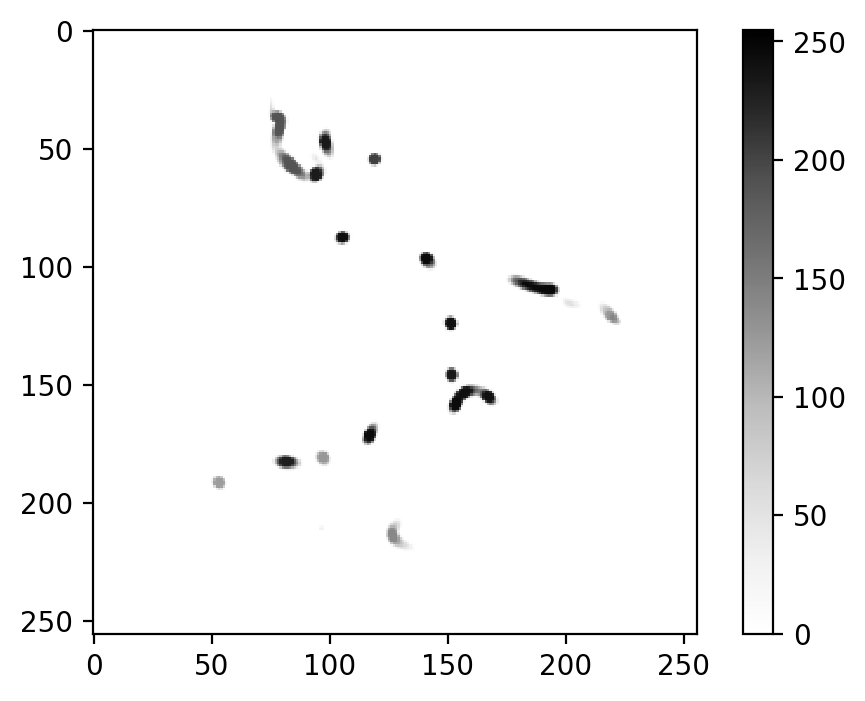

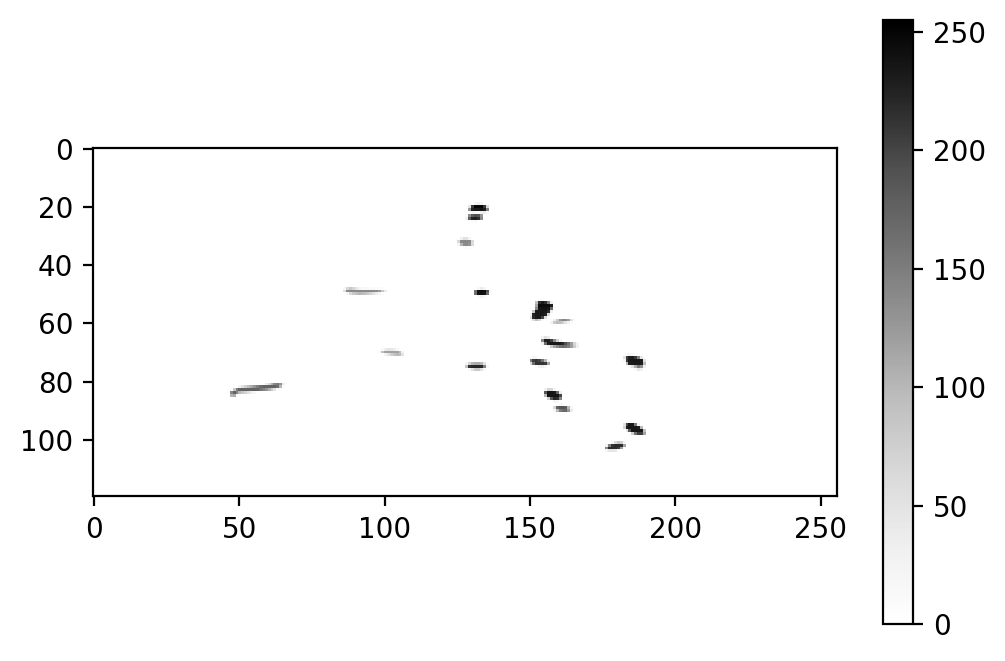

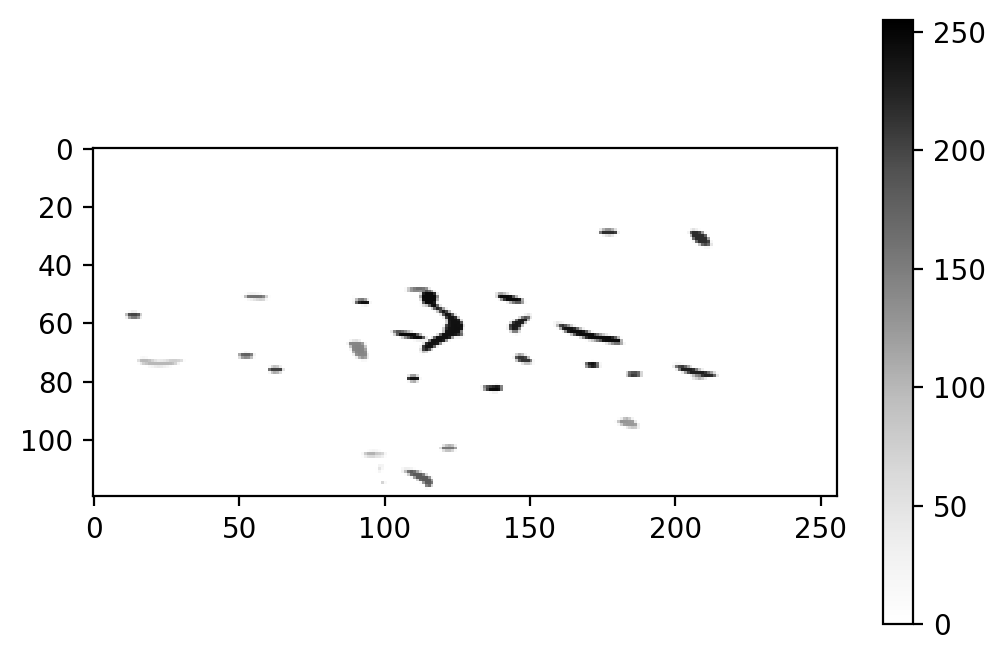

In [163]:
plot_one_slice(blurred_root, 'z', 60)
plot_one_slice(blurred_root, 'x', 150)
plot_one_slice(blurred_root, 'y', 150)


In [364]:
root = gaussian_filter(root, sigma=0.4)
blurred_root = deepcopy(root)
original_occ = deepcopy(occ)
occ = gaussian_filter(occ, sigma=0.4)
# (blurred_root!=root).astype(int).sum()

root_brightness = 0.8
blurred_root = blurred_root * root_brightness

gaussian_noise = np.random.normal(0, size=root.shape, scale=1)
gaussian_noise = normalize_to(gaussian_noise, 0.9, 1.1)
blurred_root = blurred_root * gaussian_noise

ru_noise = np.random.uniform(-0.05, 0.05, size=root.shape)
blurred_root = blurred_root + root*ru_noise

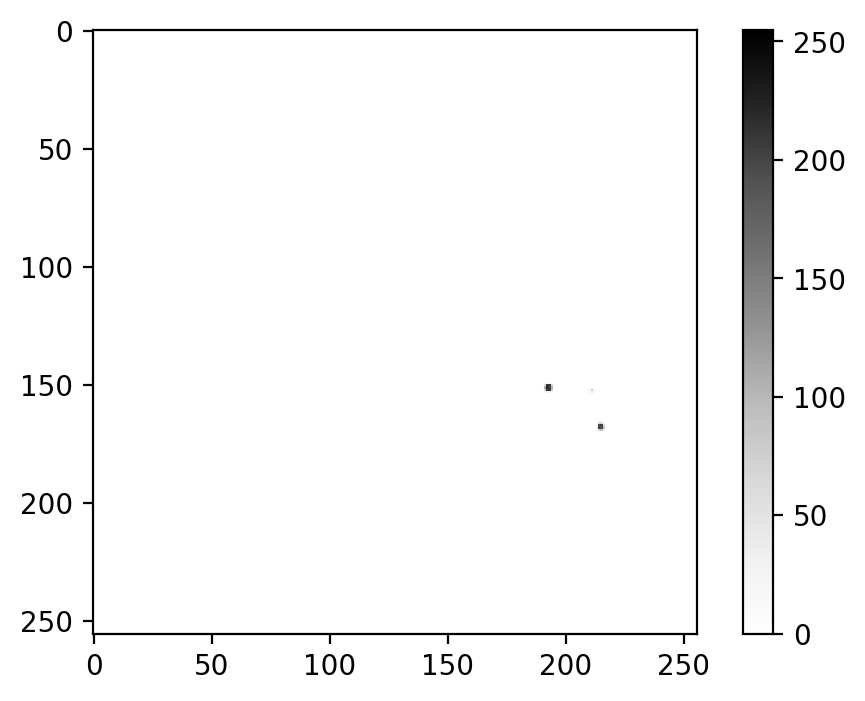

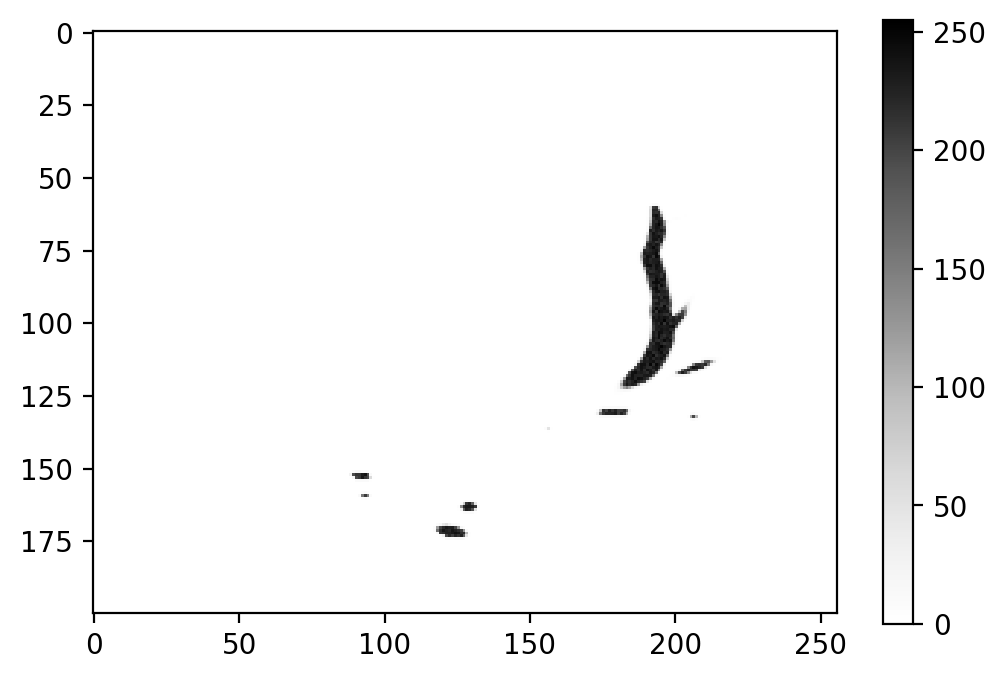

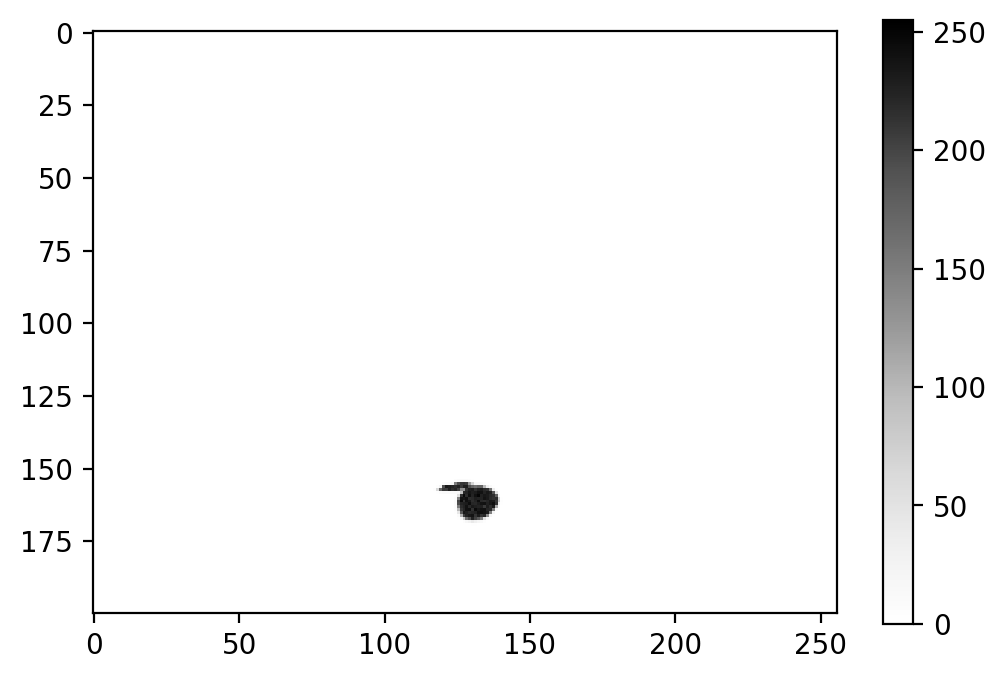

In [365]:
plot_one_slice(normalize_to(blurred_root,0,255), 'z', 60)
plot_one_slice(normalize_to(blurred_root,0,255), 'x', 150)
plot_one_slice(normalize_to(blurred_root,0,255), 'y', 150)

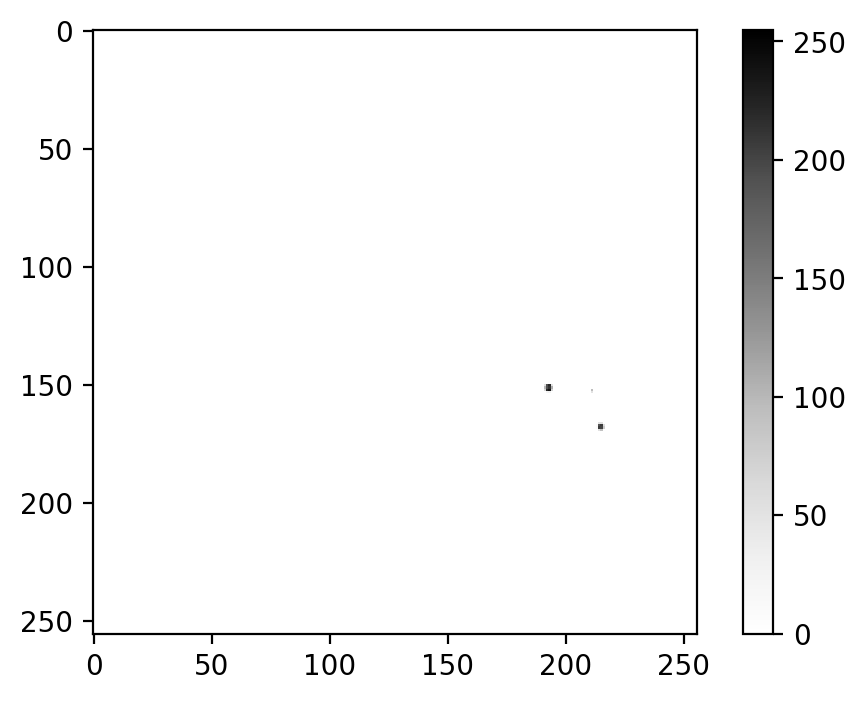

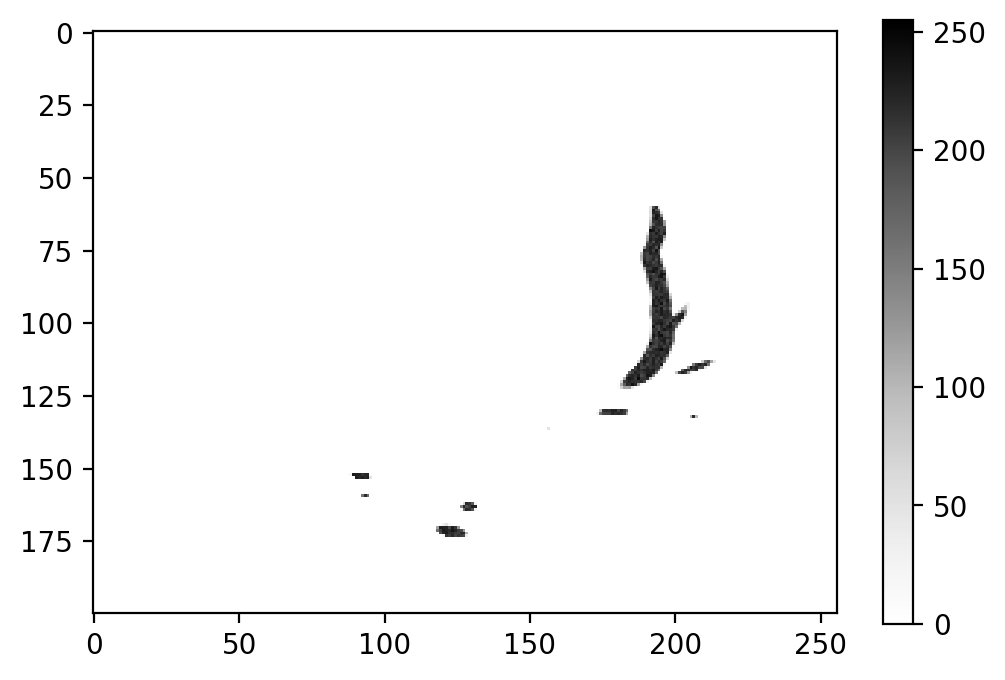

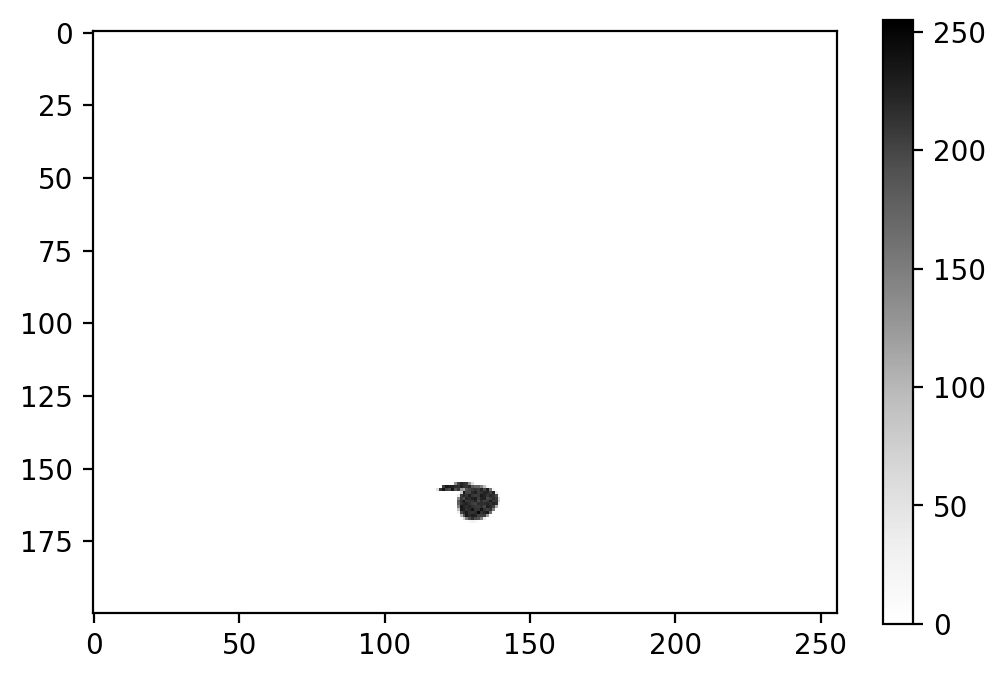

In [361]:
plot_one_slice(normalize_to(blurred_root,0,255), 'z', 60)
plot_one_slice(normalize_to(blurred_root,0,255), 'x', 150)
plot_one_slice(normalize_to(blurred_root,0,255), 'y', 150)

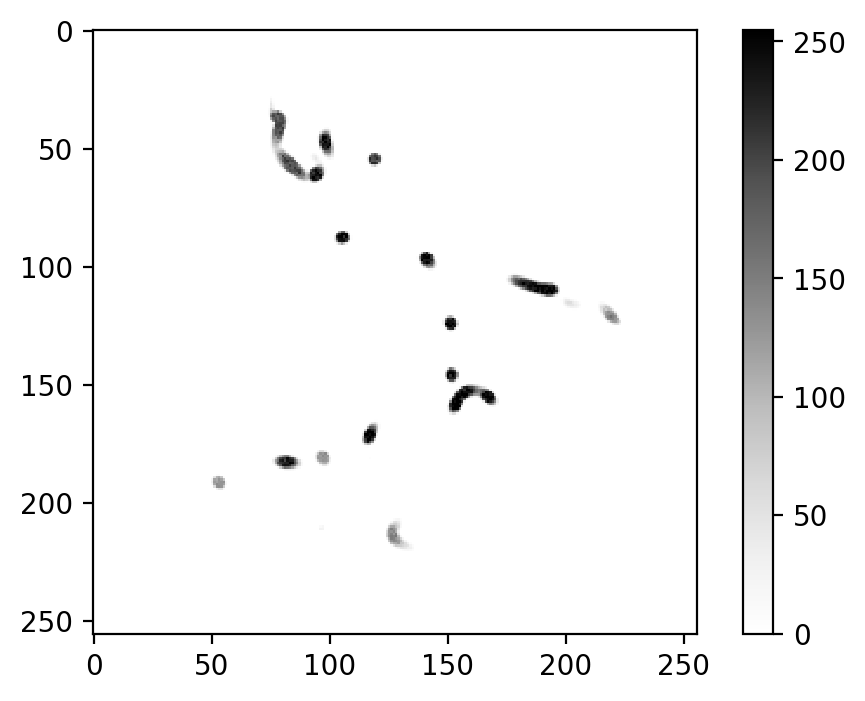

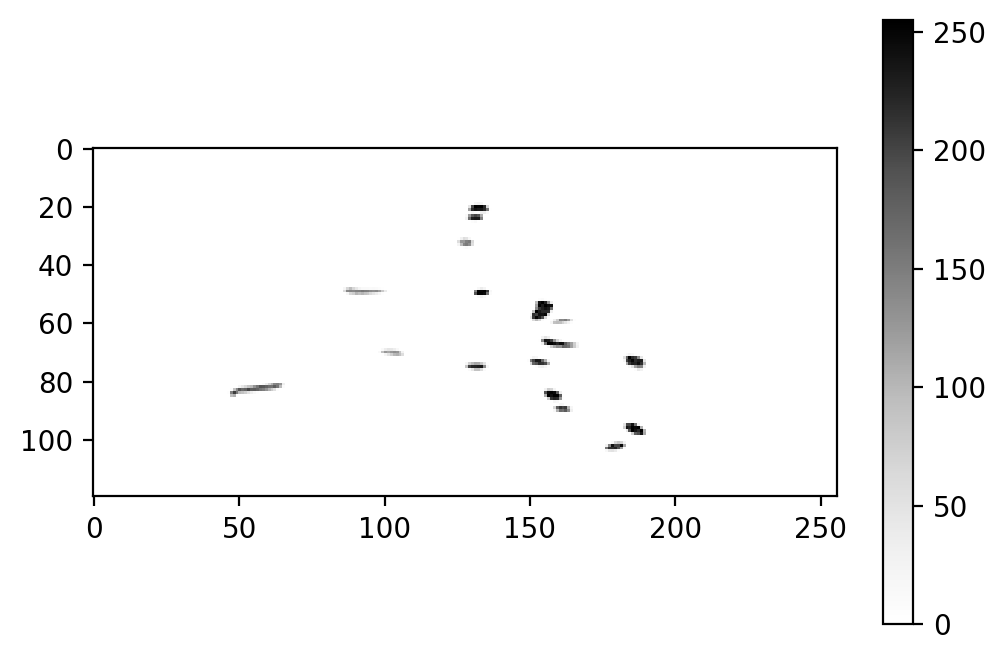

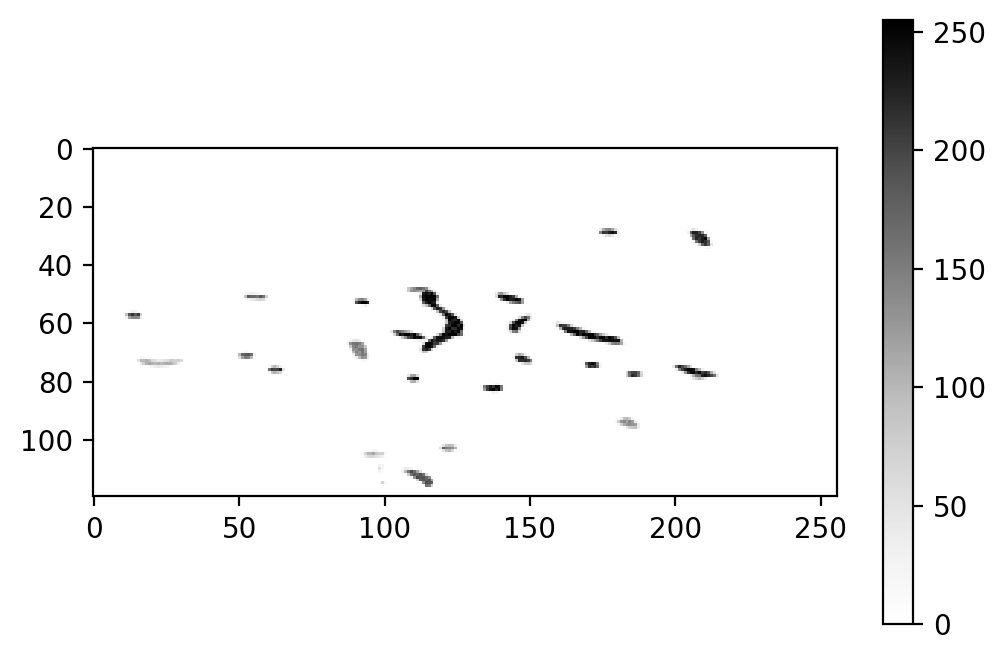

In [235]:
plot_one_slice(blurred_root, 'z', 60)
plot_one_slice(blurred_root, 'x', 150)
plot_one_slice(blurred_root, 'y', 150)

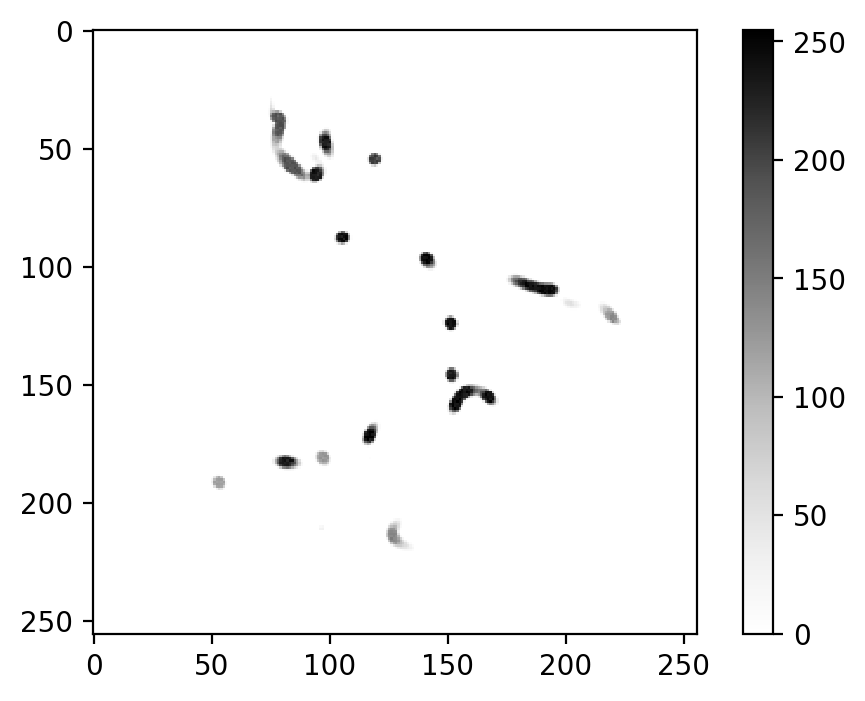

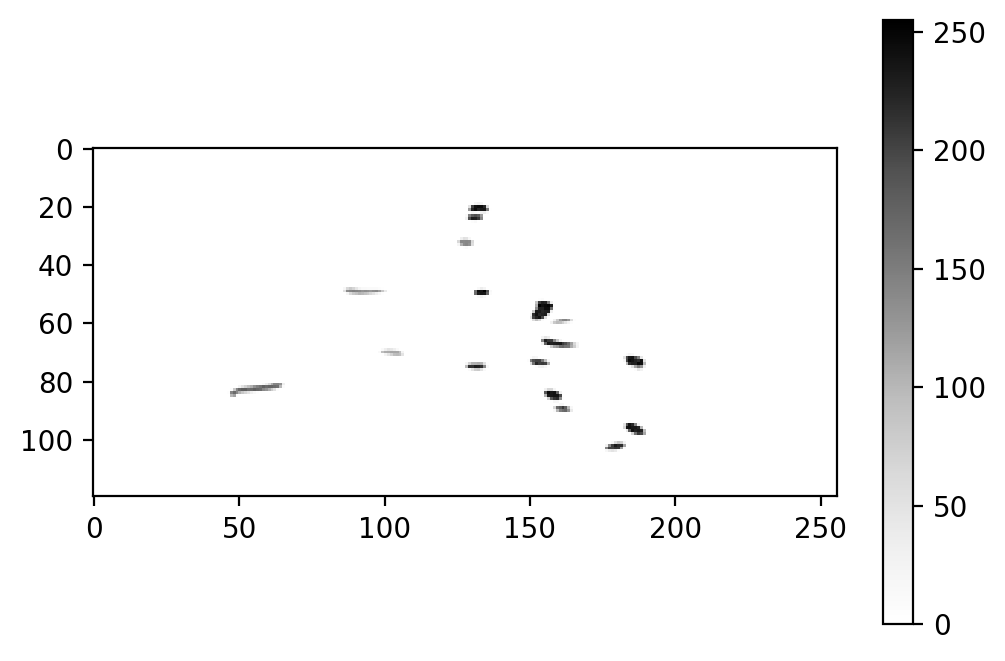

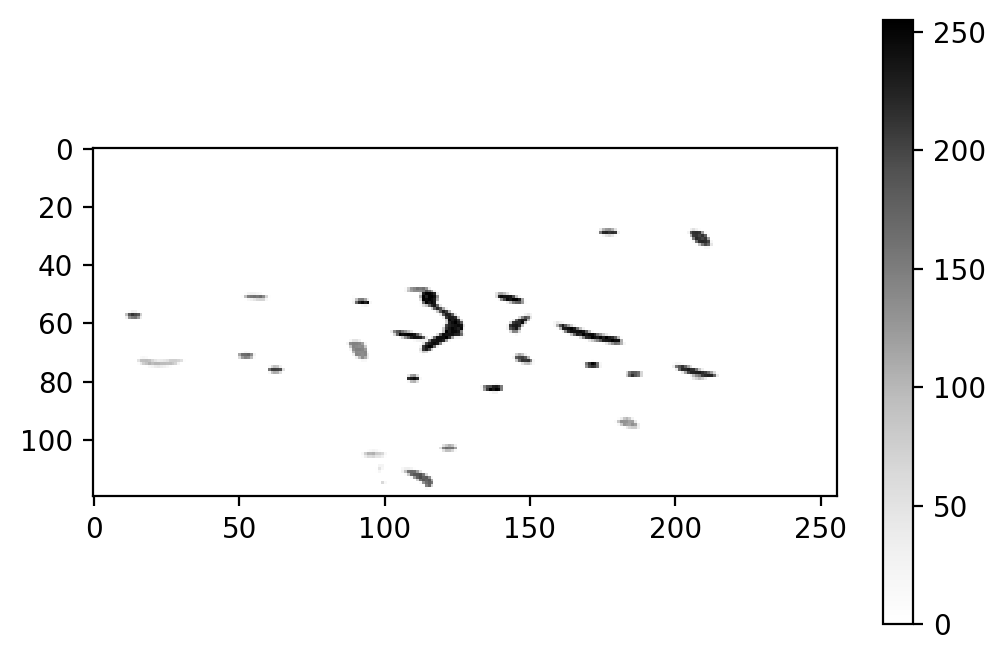

In [233]:
plot_one_slice(blurred_root, 'z', 60)
plot_one_slice(blurred_root, 'x', 150)
plot_one_slice(blurred_root, 'y', 150)

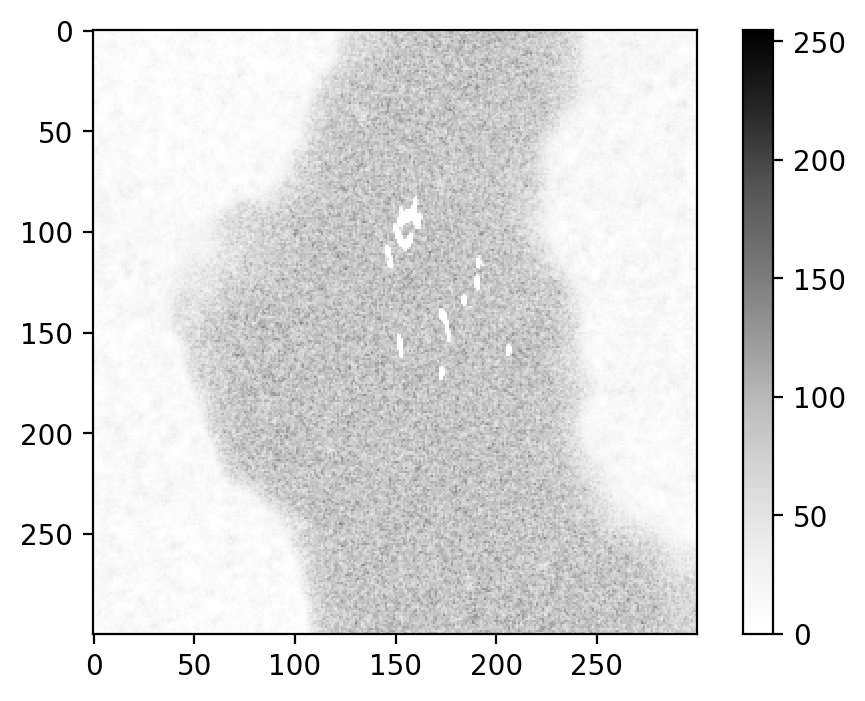

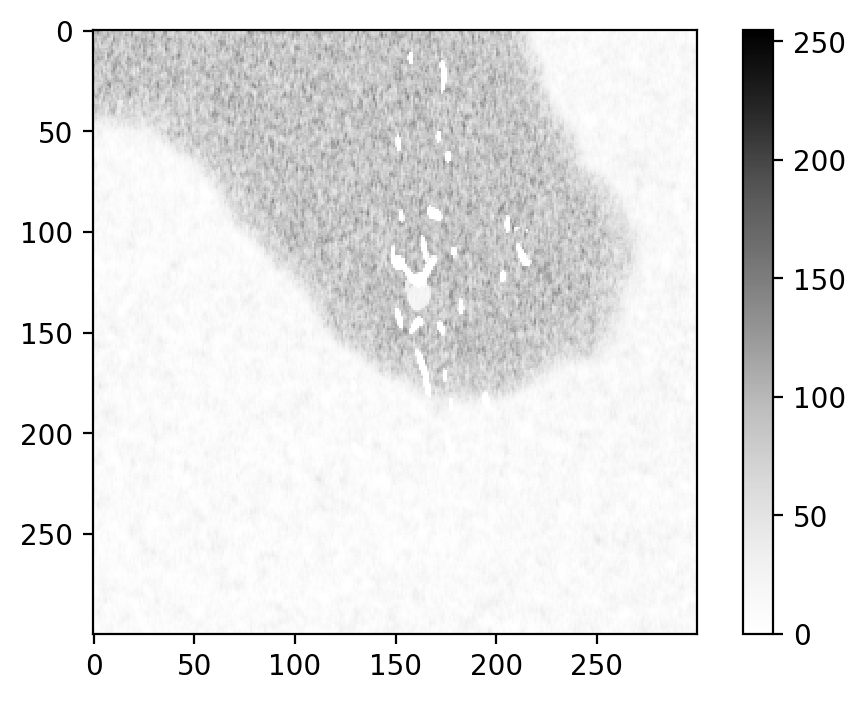

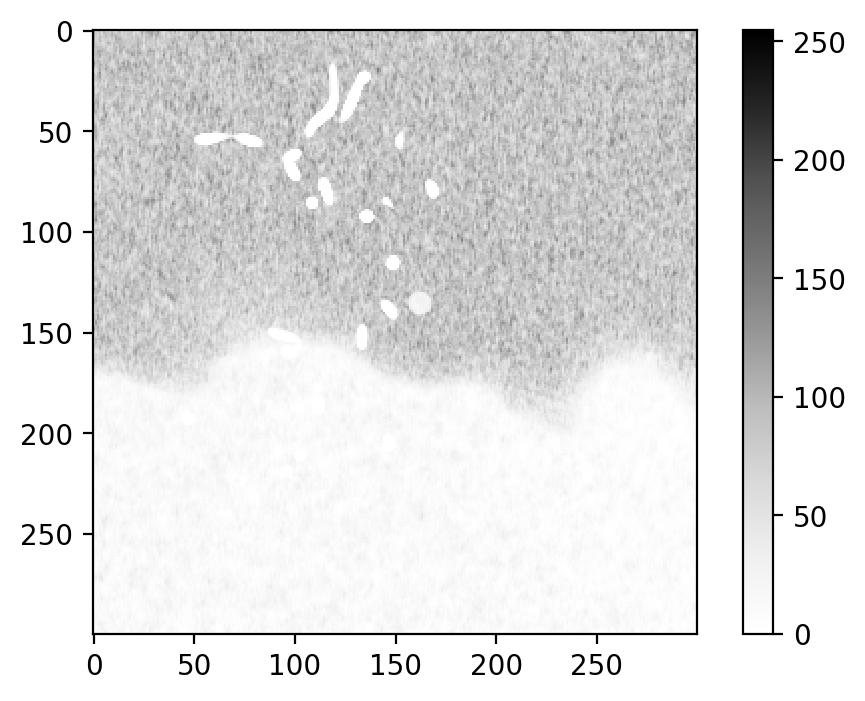

In [315]:
plot_one_slice(soil, 'z', 60)
plot_one_slice(soil, 'x', 150)
plot_one_slice(soil, 'y', 150)


In [208]:
soil.shape

(120, 256, 256)

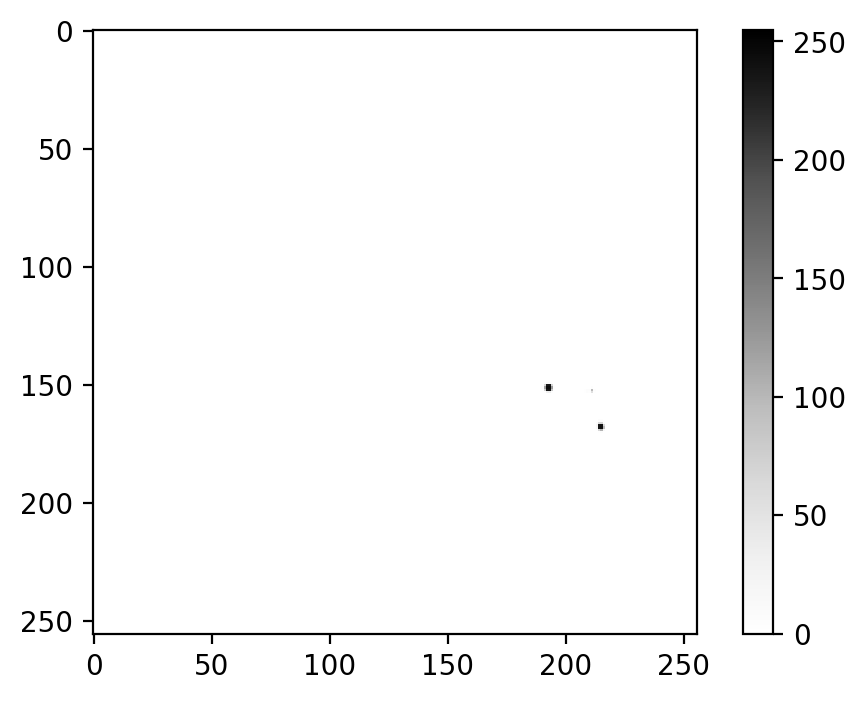

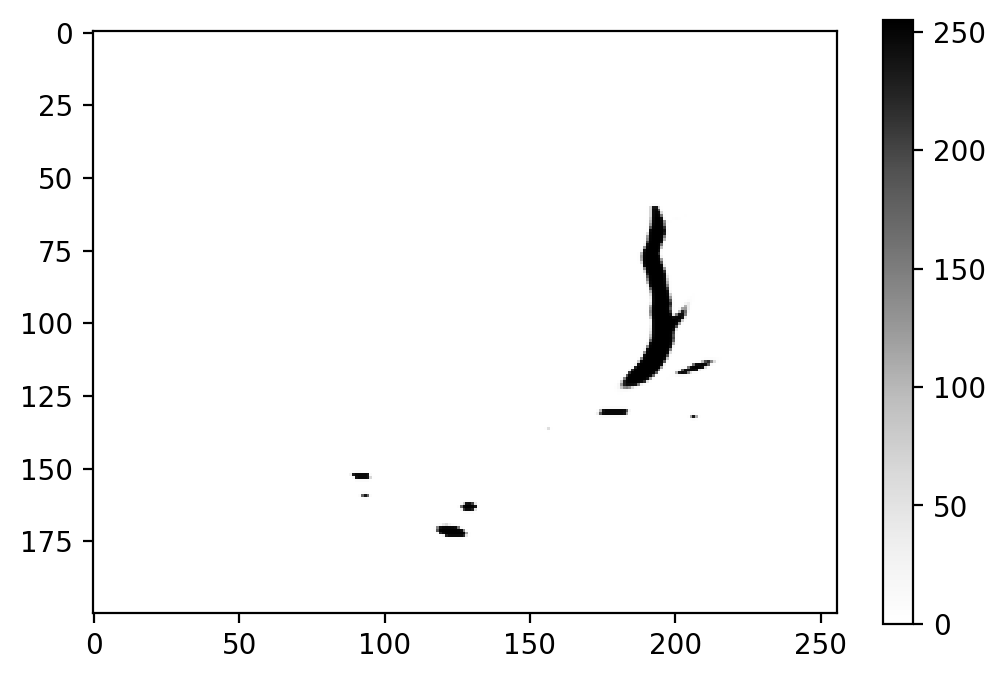

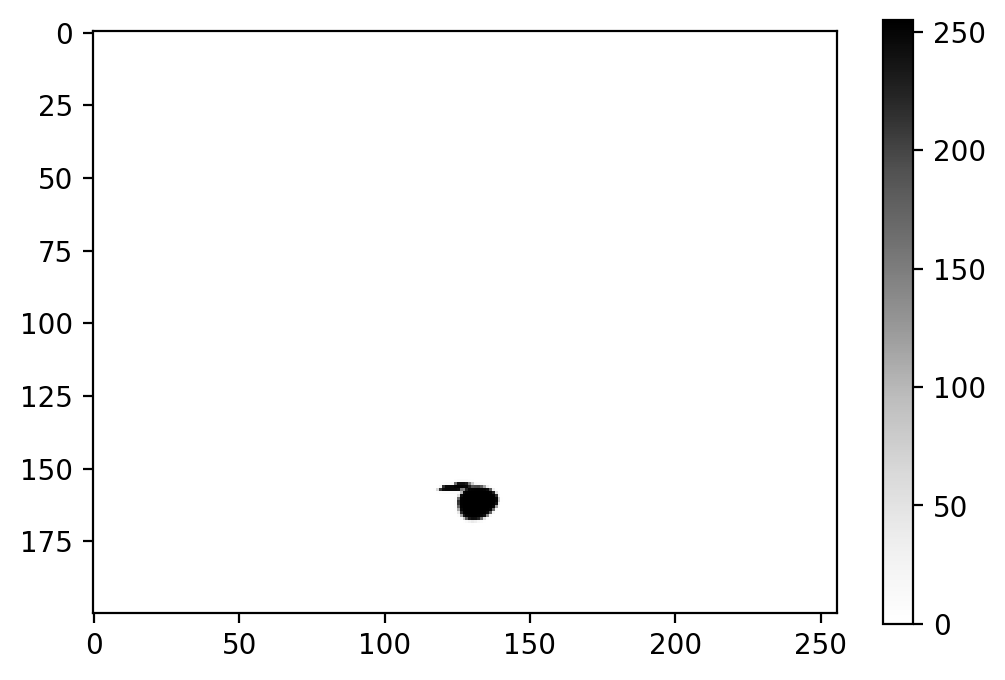

In [311]:
plot_one_slice(original_occ, 'z', 60)
plot_one_slice(original_occ, 'x', 150)
plot_one_slice(original_occ, 'y', 150)



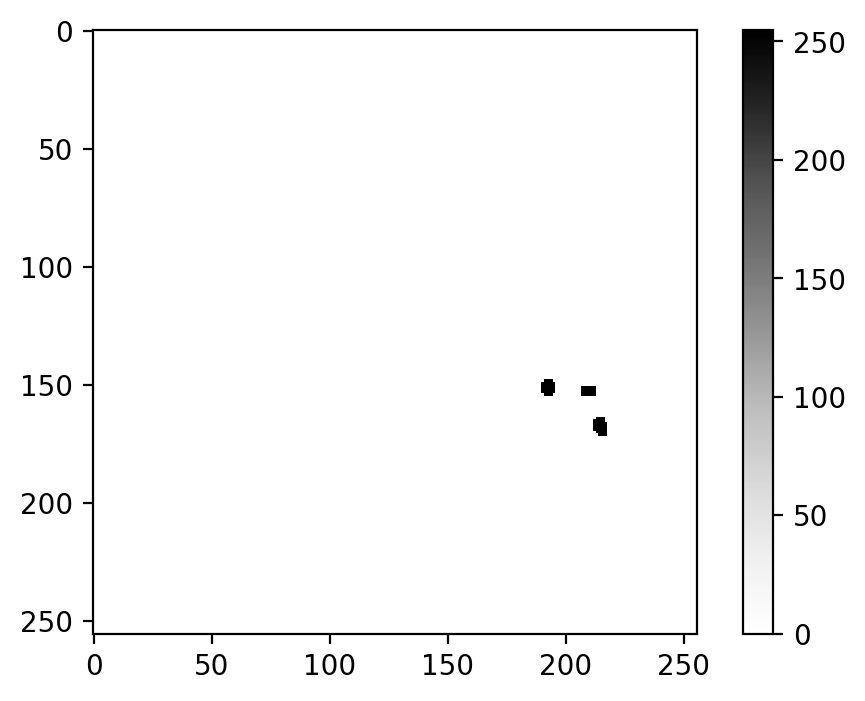

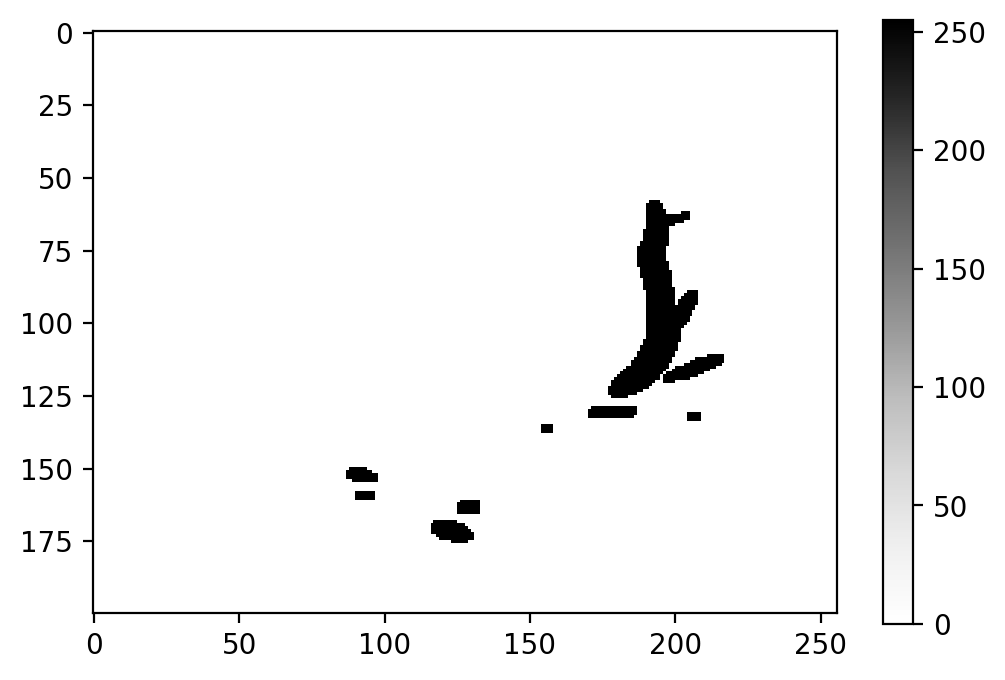

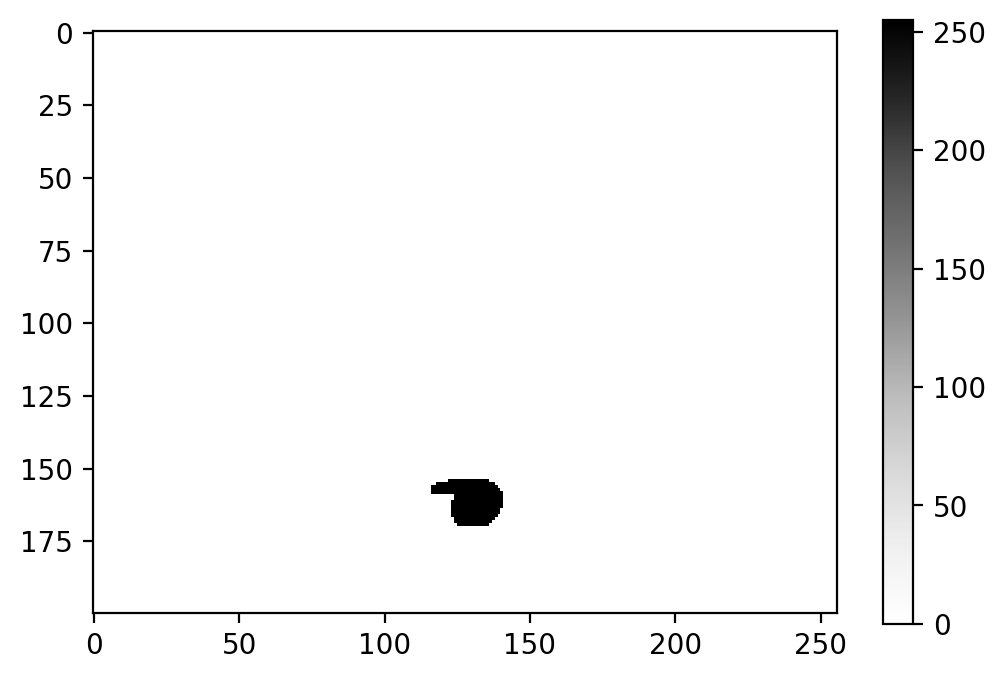

In [354]:
plot_one_slice((occ!=0).astype(int)*255, 'z', 60)
plot_one_slice((occ!=0).astype(int)*255, 'x', 150)
plot_one_slice((occ!=0).astype(int)*255, 'y', 150)




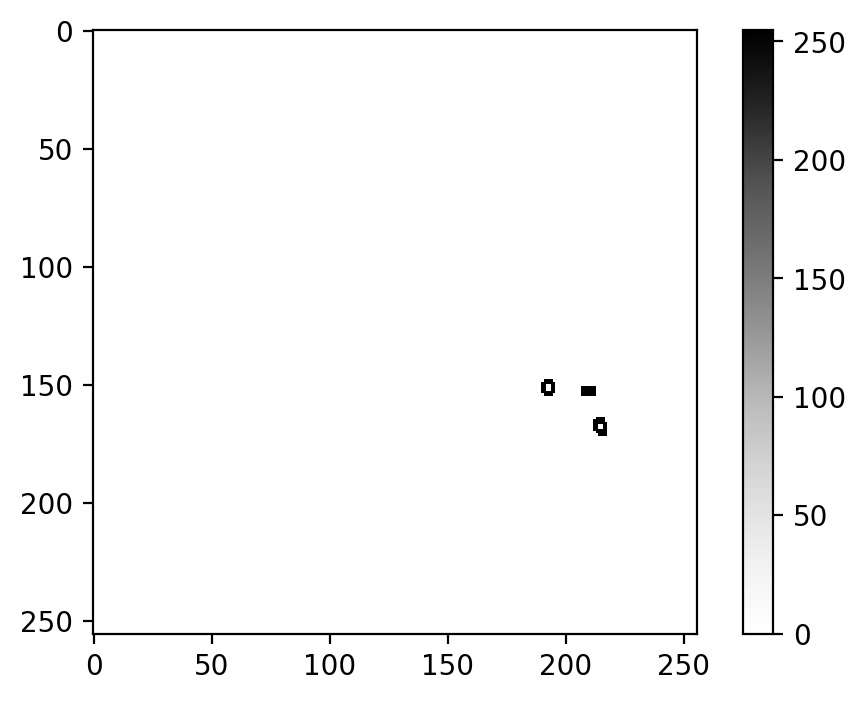

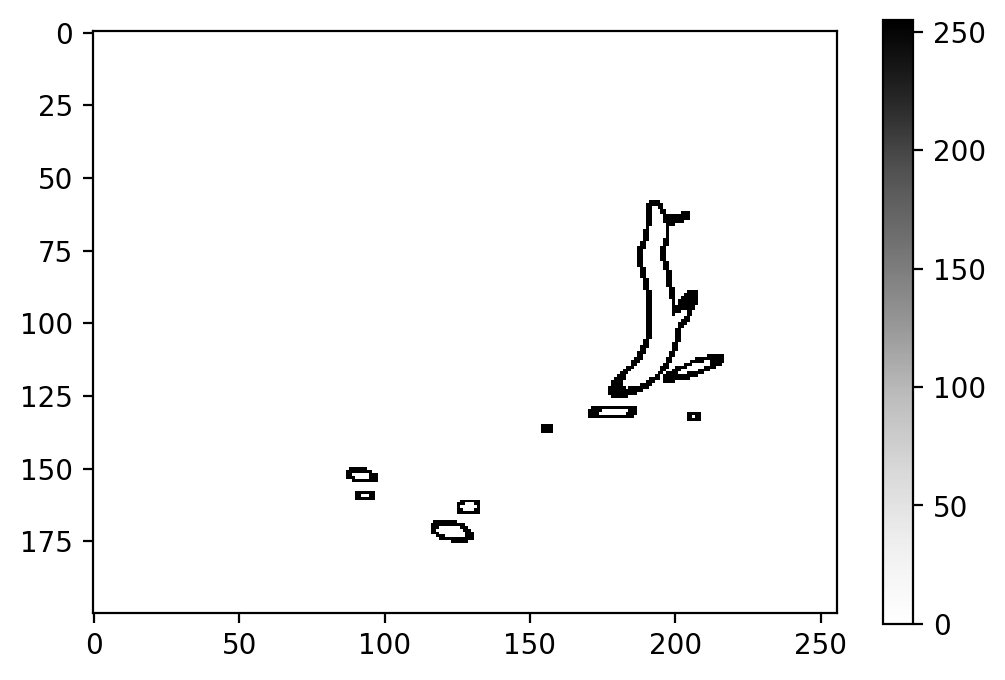

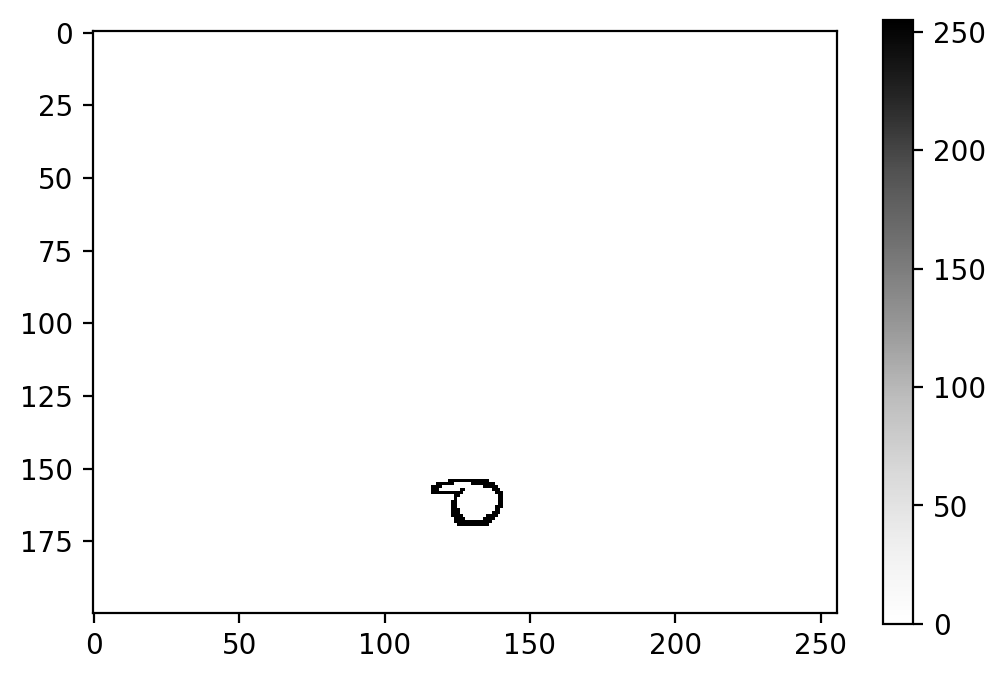

In [353]:
plot_one_slice(((occ>0)*(occ<150)).astype(int)*255, 'z', 60)
plot_one_slice(((occ>0)*(occ<150)).astype(int)*255, 'x', 150)
plot_one_slice(((occ>0)*(occ<150)).astype(int)*255, 'y', 150)



In [258]:
(original_occ!=occ).astype(int).sum()

81448

In [362]:
alpha = 0.7

soil_crop = np.rollaxis(soil[ :256, :256, :200], 2, 0)
soil_crop *= (1 - occ/255.*alpha)
combined = soil_crop + blurred_root*alpha

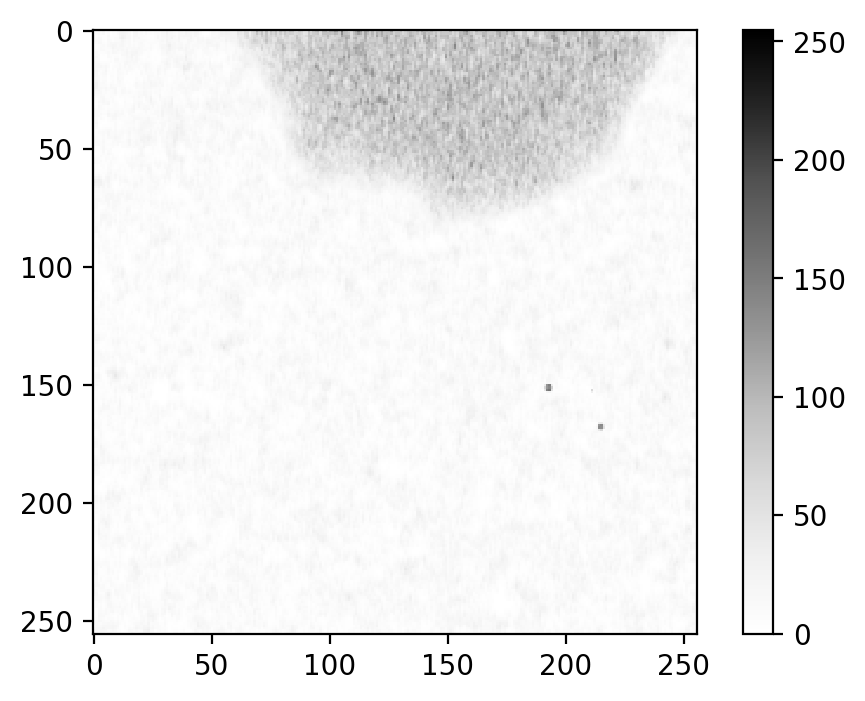

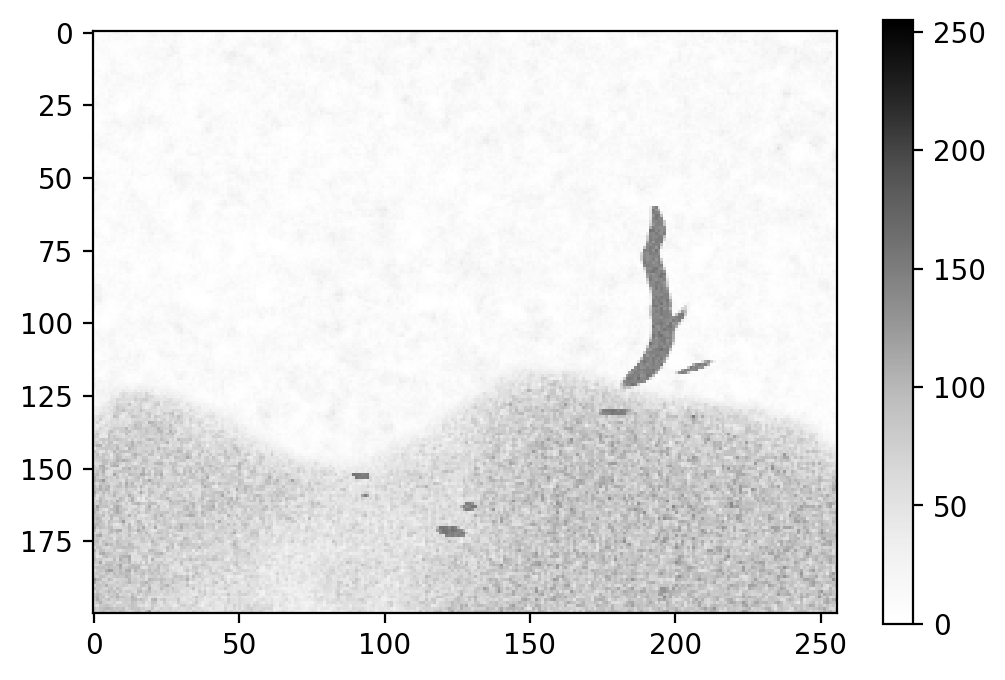

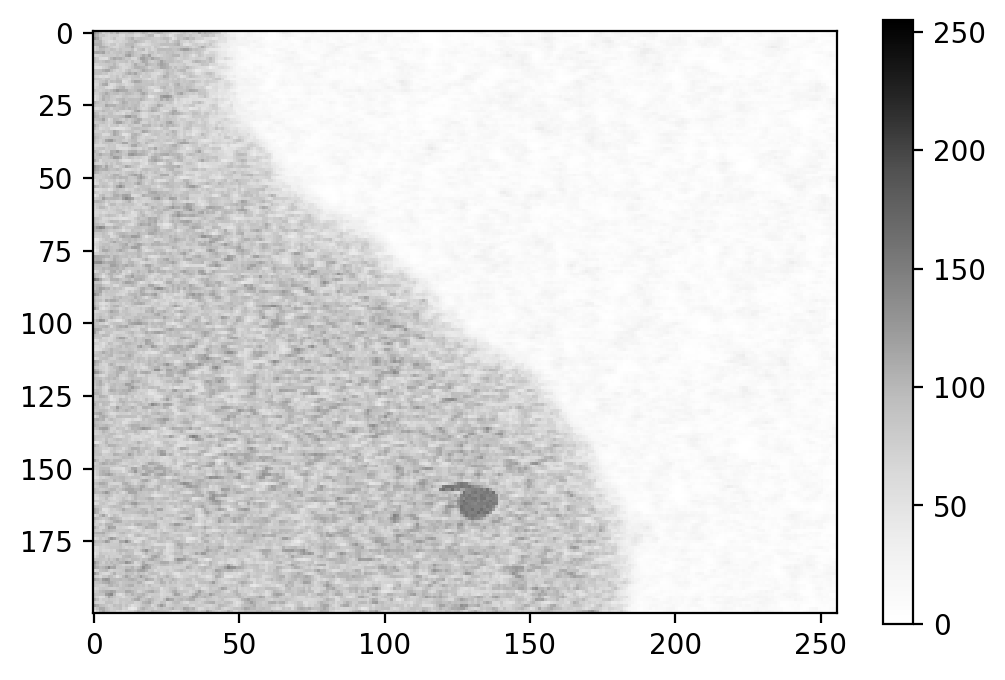

In [363]:
plot_one_slice(combined, 'z', 60)
plot_one_slice(combined, 'x', 150)
plot_one_slice(combined, 'y', 150)

In [357]:
# flt = np.ones([1, 3, 1])
# flt[:, 0, :] = 1
# flt[:, 1, :] = 1.5
# flt[:, 2, :] = 2.5
# flt /= float(flt.sum())
# combined = convolve(combined, weights=flt)
combined = gaussian_filter(combined, sigma=0.4)

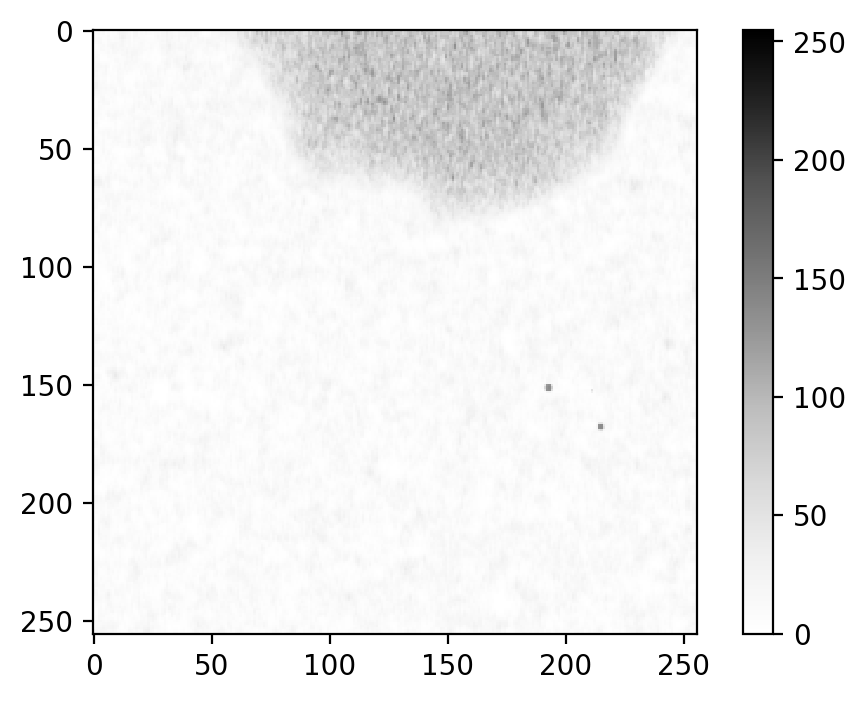

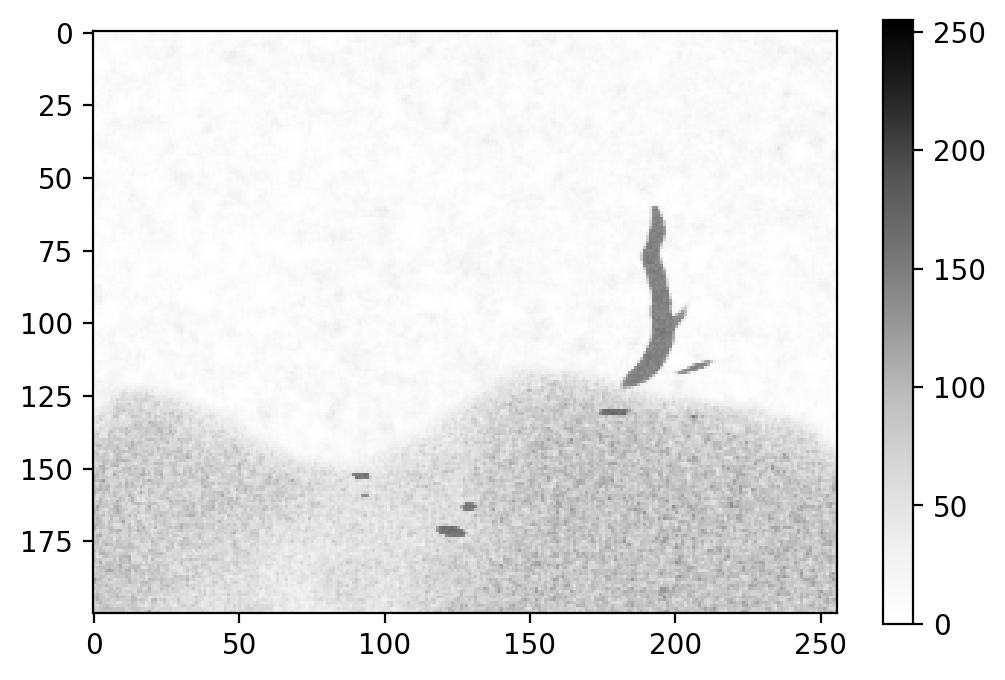

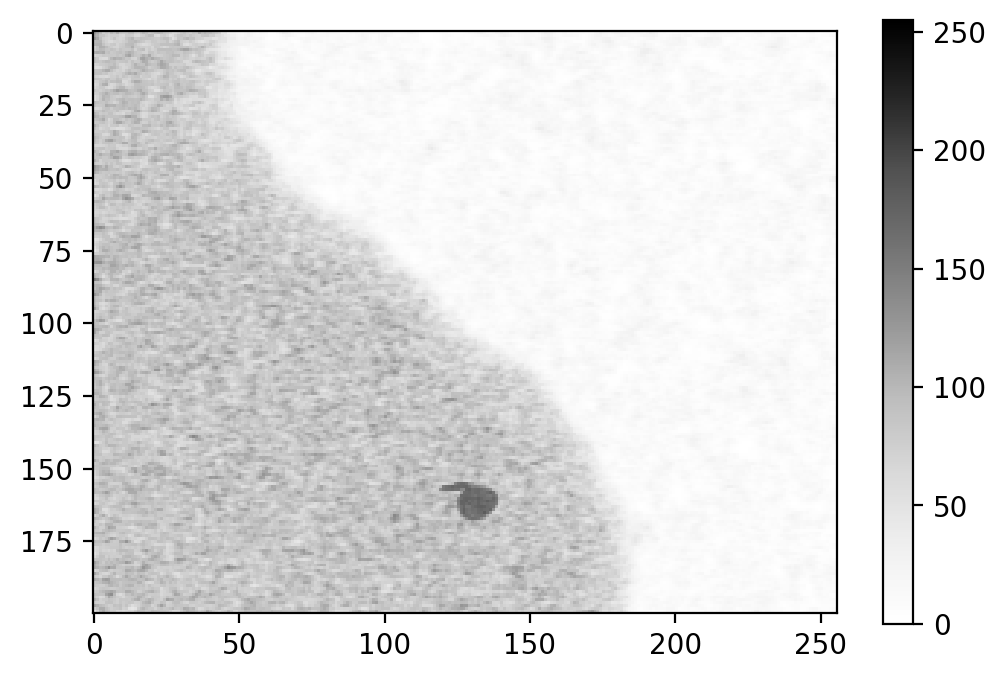

In [358]:
# plot_one_slice(combined, 'z', 60)
plot_one_slice(combined, 'x', 150)
# plot_one_slice(combined, 'y', 150)



In [267]:
# combined[occ>0]=0
# combined += blurred_root

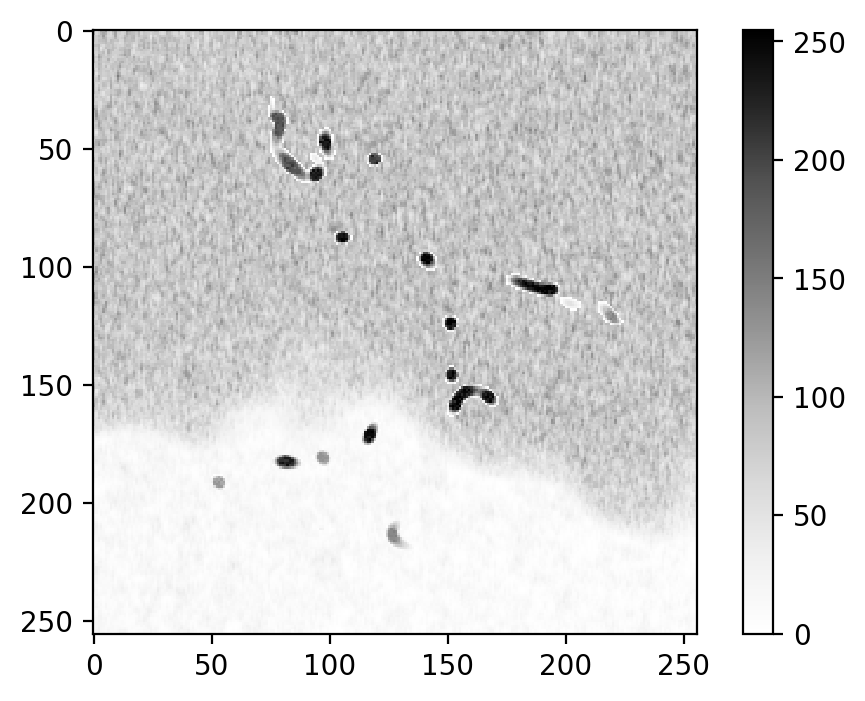

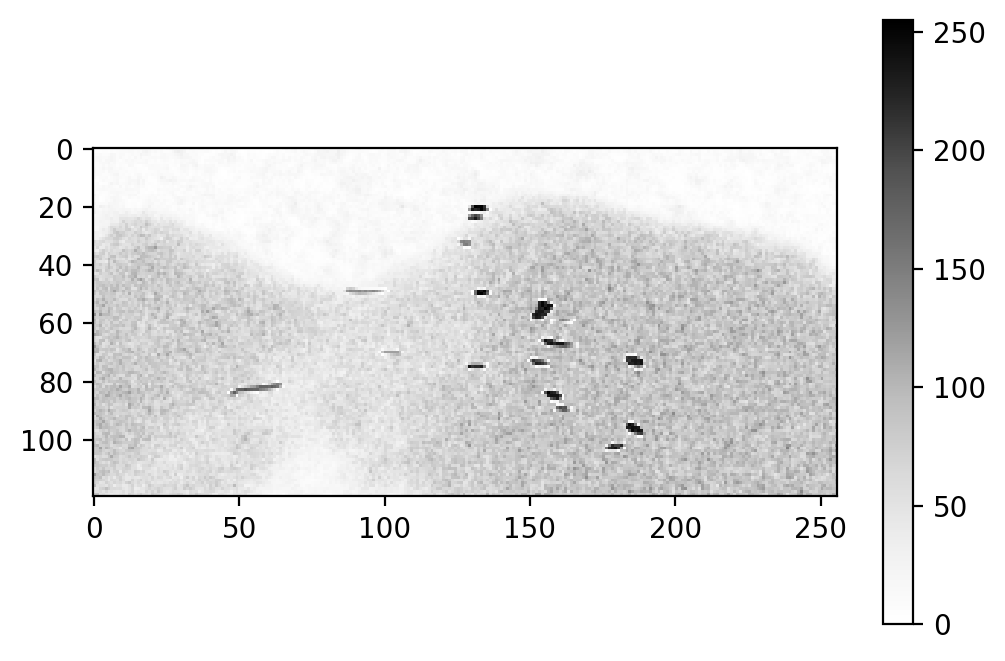

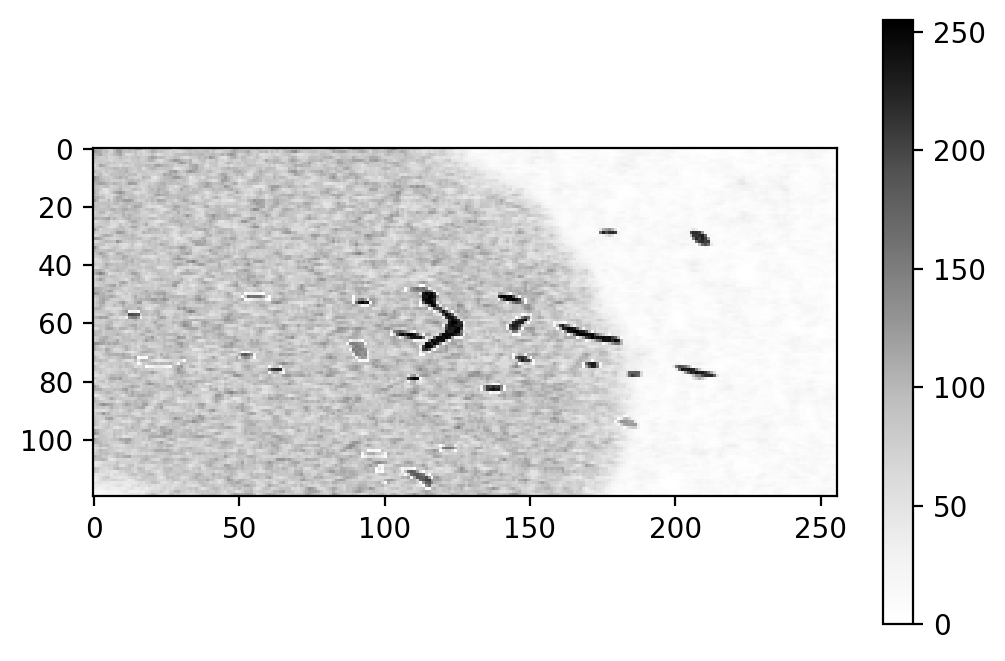

In [268]:

plot_one_slice(combined, 'z', 60)
plot_one_slice(combined, 'x', 150)
plot_one_slice(combined, 'y', 150)



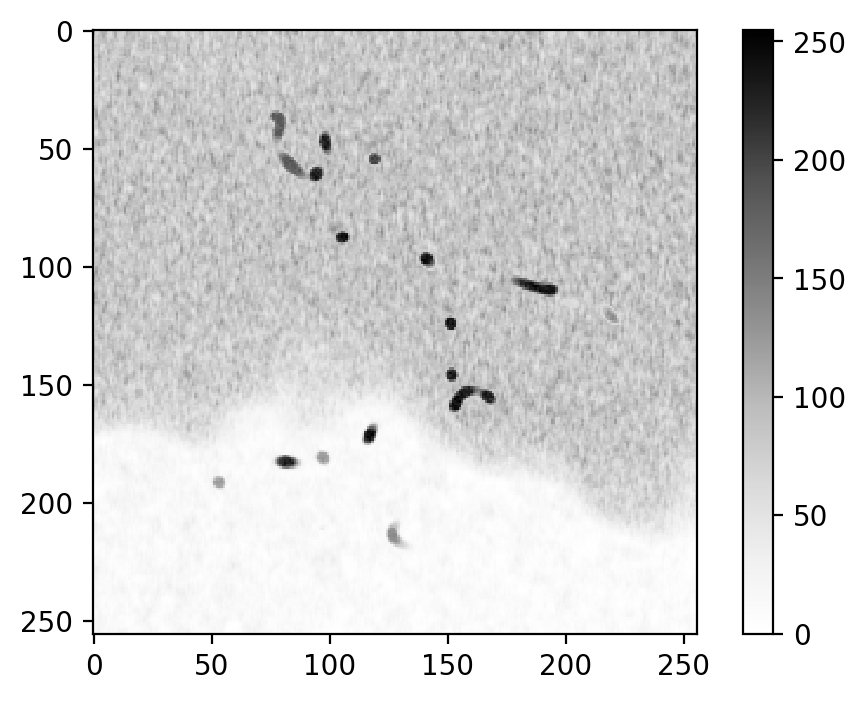

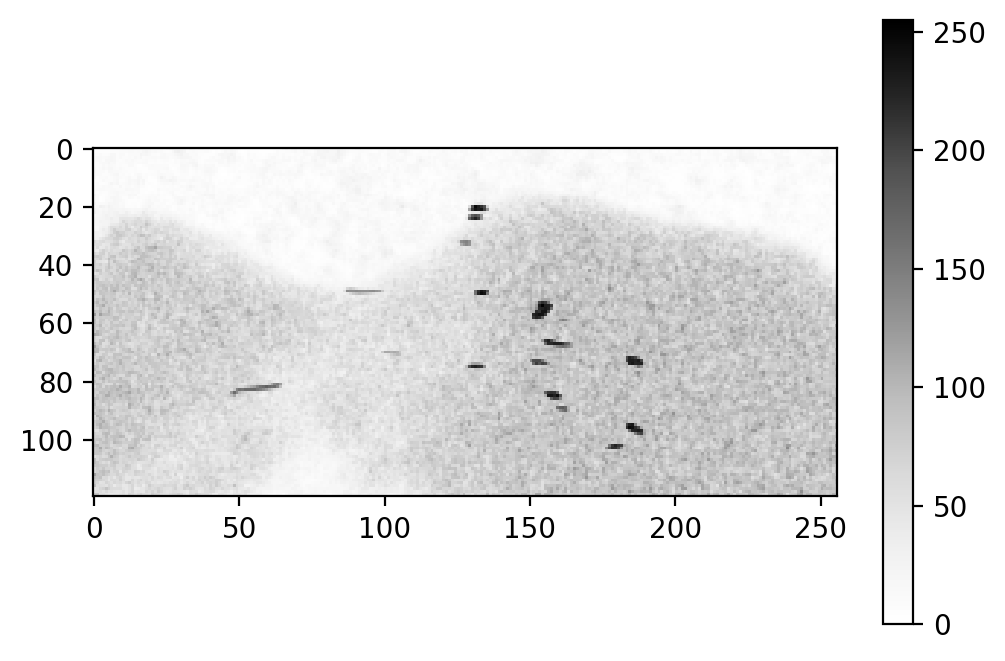

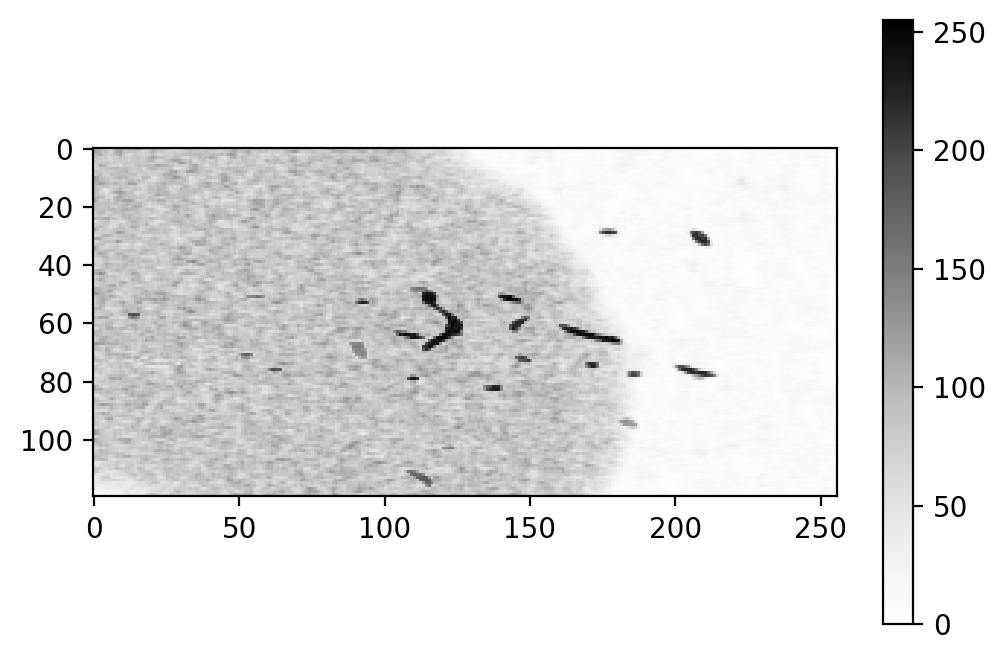

In [244]:
plot_one_slice(combined, 'z', 60)
plot_one_slice(combined, 'x', 150)
plot_one_slice(combined, 'y', 150)

